# Exploracion de variables

In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import descarga_drive

In [2]:
descarga_drive.main('archivos_final.txt')

Archivo final_AAPL.parquet guardado en: C:\Users\hecto\UNI\2\PDI\MBA-Finance\data\final_AAPL.parquet
Archivo final_F.parquet guardado en: C:\Users\hecto\UNI\2\PDI\MBA-Finance\data\final_F.parquet
Archivo final_GOOG.parquet guardado en: C:\Users\hecto\UNI\2\PDI\MBA-Finance\data\final_GOOG.parquet
Archivo final_META.parquet guardado en: C:\Users\hecto\UNI\2\PDI\MBA-Finance\data\final_META.parquet
Archivo final_MSFT.parquet guardado en: C:\Users\hecto\UNI\2\PDI\MBA-Finance\data\final_MSFT.parquet
Archivo final_TSLA.parquet guardado en: C:\Users\hecto\UNI\2\PDI\MBA-Finance\data\final_TSLA.parquet
Archivo datos_final.parquet guardado en: C:\Users\hecto\UNI\2\PDI\MBA-Finance\data\datos_final.parquet


In [3]:
df = pd.read_parquet(Path(Path.cwd(), 'data/datos_final.parquet'))
df['Sent_aux'] = np.where(df['Sent']=='neutral', 0, np.where(df['Sent']=='negative', -1, 1))

Primero vamos a mostrar informacion generica sobre el dataphrame para ver los tipos que toma cada columna y las medias, deviaciones tipicas...

In [5]:
pd.set_option('display.max_info_columns', len(df.columns))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20285 entries, 0 to 20284
Data columns (total 112 columns):
 #    Column                     Non-Null Count  Dtype         
---   ------                     --------------  -----         
 0    Date                       20285 non-null  datetime64[ns]
 1    Open                       20285 non-null  float64       
 2    High                       20285 non-null  float64       
 3    Low                        20285 non-null  float64       
 4    Close                      20285 non-null  float64       
 5    Adj Close                  20285 non-null  float64       
 6    Volume                     20285 non-null  int64         
 7    Symbol                     20285 non-null  object        
 8    Rets                       20285 non-null  float64       
 9    Ret_1                      20285 non-null  float64       
 10   Ret_2                      20285 non-null  float64       
 11   Ret_3                      20285 non-null  float64  

In [6]:
df.iloc[:, :22].describe()

Date          Open          High  \
count                          20285  20285.000000  20285.000000   
mean   2017-06-15 04:43:35.923095808     79.622712     80.645818   
min              2010-04-16 00:00:00      1.344000      1.352000   
25%              2014-02-18 00:00:00     15.227673     15.393333   
50%              2017-06-26 00:00:00     35.345001     35.669998   
75%              2020-11-02 00:00:00    125.339996    126.699997   
max              2024-03-14 00:00:00    514.190002    523.570007   
std                              NaN     90.428910     91.677459   

                Low         Close     Adj Close        Volume          Rets  \
count  20285.000000  20285.000000  20285.000000  2.028500e+04  20285.000000   
mean      78.593390     79.650698     77.719192  8.517588e+07      0.001043   
min        1.333333      1.336667      1.336667  1.584340e+05     -0.263901   
25%       15.060000     15.225357     13.482667  2.626640e+07     -0.009091   
50%       34.972500     35.323002     32.364174  4.630950e+07      0.000683   
75%      124.209999    125.500000    124.178246  9.173490e+07      0.011310   
max      501.380005    512.190002    512.190002  1.880998e+09      0.296115   
std       89.170619     90.456388     90.736008  1.201500e+08      0.023043   

              Ret_1         Ret_2  ...         VMA10         VMA20  \
count  20285.000000  20285.000000  ...  20285.000000  20285.000000   
mean       0.001049      0.001047  ...      0.001050      0.001052   
min       -0.263901     -0.263901  ...     -0.067445     -0.042859   
25%       -0.009088     -0.009091  ...     -0.002647     -0.001657   
50%        0.000683      0.000683  ...      0.001011      0.000982   
75%        0.011310      0.011321  ...      0.004570      0.003457   
max        0.296115      0.296115  ...      0.058531      0.039007   
std        0.023044      0.023051  ...      0.007108      0.005136   

              VMA30         VMA40         VMA50         VMA60     VMA_1ªsem  \
count  20285.000000  20285.000000  20285.000000  20285.000000  20285.000000   
mean       0.001050      0.001049      0.001049      0.001050      0.001047   
min       -0.026674     -0.019184     -0.015912     -0.013809     -0.068051   
25%       -0.001232     -0.000941     -0.000767     -0.000648     -0.003278   
50%        0.000941      0.000944      0.000951      0.000955      0.001054   
75%        0.003003      0.002749      0.002543      0.002369      0.005201   
max        0.033538      0.025922      0.024566      0.020842      0.079071   
std        0.004232      0.003665      0.003275      0.002990      0.008504   

          VMA_2ªsem     VMA_3ªsem     VMA_4ªsem  
count  20285.000000  20285.000000  20285.000000  
mean       0.001055      0.001054      0.001048  
min       -0.068051     -0.068051     -0.068051  
25%       -0.003269     -0.003270     -0.003266  
50%        0.001063      0.001063      0.001067  
75%        0.005206      0.005204      0.005206  
max        0.079071      0.079071      0.079071  
std        0.008501      0.008502      0.008528  

[8 rows x 21 columns]

In [7]:
df.iloc[:, 22:44].describe()

VMA_5ªsem    volume_adi    volume_obv    volume_cmf     volume_fi  \
count  20285.000000  2.028500e+04  2.028500e+04  20285.000000  2.028500e+04   
mean       0.001042  5.075163e+09  4.516319e+09      0.033512  3.859833e+06   
std        0.008524  7.674459e+09  5.720974e+09      0.143797  1.022546e+08   
min       -0.068051 -2.672724e+09 -3.839763e+09     -0.503189 -2.248571e+09   
25%       -0.003266  3.950787e+08  5.975109e+08     -0.064881 -6.309621e+06   
50%        0.001070  1.661934e+09  2.227428e+09      0.029846  8.073331e+05   
75%        0.005207  5.271134e+09  5.623007e+09      0.131097  1.075330e+07   
max        0.079071  2.880866e+10  2.517825e+10      0.572440  1.935462e+09   

          volume_em  volume_sma_em    volume_vpt   volume_vwap    volume_mfi  \
count  20285.000000   20285.000000  2.028500e+04  20285.000000  20285.000000   
mean       0.470872       0.455341  1.553061e+08     79.155034     52.789213   
std       60.650788      16.004829  3.146970e+08     89.760253     16.100366   
min    -2588.253779    -169.565853 -2.112246e+08      1.368950      0.432235   
25%       -0.224867      -0.055098 -1.709985e+07     15.174180     41.358422   
50%        0.007251       0.005283  7.392956e+07     34.987104     52.892996   
75%        0.405447       0.185969  2.188956e+08    124.527170     64.462513   
max     2831.388327     269.140471  1.503744e+09    494.975617    100.000000   

       ...  volatility_bbh  volatility_bbl  volatility_bbw  volatility_bbp  \
count  ...    20285.000000    20285.000000    20285.000000    20285.000000   
mean   ...       84.531024       73.528951       13.550590        0.560508   
std    ...       96.427338       83.083278        9.464581        0.331355   
min    ...        1.417711        1.115491        1.698116       -0.496336   
25%    ...       16.106075       14.206083        7.517382        0.297187   
50%    ...       36.745592       32.871856       11.126524        0.595469   
75%    ...      131.271632      115.847102       16.591248        0.826284   
max    ...      519.184926      467.133227       95.740940        1.524274   

       volatility_bbhi  volatility_bbli  volatility_kcc  volatility_kch  \
count     20285.000000     20285.000000    20285.000000    20285.000000   
mean          0.073897         0.047128       79.337334       81.381943   
std           0.261610         0.211919       90.009578       92.524073   
min           0.000000         0.000000        1.362511        1.394711   
25%           0.000000         0.000000       15.200667       15.530555   
50%           0.000000         0.000000       35.095334       35.760001   
75%           0.000000         0.000000      125.049666      127.721670   
max           1.000000         1.000000      497.979336      512.129329   

       volatility_kcl  volatility_kcw  
count    20285.000000    20285.000000  
mean        77.292725        4.979813  
std         87.522180        2.546567  
min          1.329844        1.411268  
25%         14.866667        3.209108  
50%         34.428667        4.270388  
75%        122.517997        6.077340  
max        484.084008       25.614955  

[8 rows x 22 columns]

In [6]:
df.iloc[:, 44:66].describe()

volatility_kcp  volatility_kchi  volatility_kcli  volatility_dcl  \
count    20285.000000     20285.000000     20285.000000    20285.000000   
mean         0.608091         0.282771         0.187873       73.139412   
std          0.696929         0.450357         0.390620       82.546710   
min         -3.967597         0.000000         0.000000        1.300000   
25%          0.147691         0.000000         0.000000       14.080000   
50%          0.614912         0.000000         0.000000       32.570000   
75%          1.065876         1.000000         0.000000      115.830002   
max          5.874936         1.000000         1.000000      461.790009   

       volatility_dch  volatility_dcm  volatility_dcw  volatility_dcp  \
count    20285.000000    20285.000000    20285.000000    20285.000000   
mean        84.615527       78.877470       14.135225        0.572674   
std         96.501787       89.370794        8.723583        0.302488   
min          1.458000        1.388333        2.515648        0.000000   
25%         16.129999       15.165406        8.465890        0.309382   
50%         36.500000       34.721701       12.006506        0.615079   
75%        131.979996      124.735004       16.984342        0.851306   
max        523.570007      492.680008       91.130486        1.000000   

       volatility_atr  volatility_ui  ...  trend_macd_diff  trend_sma_fast  \
count    20285.000000   20285.000000  ...     20285.000000    20285.000000   
mean         2.253557       4.515406  ...         0.002382       79.292761   
std          3.198026       3.915822  ...         0.954453       89.938340   
min          0.038429       0.024821  ...        -9.571234        1.362833   
25%          0.386547       1.724759  ...        -0.122784       15.185000   
50%          0.738481       3.353277  ...         0.002987       35.039584   
75%          2.848798       6.138260  ...         0.134241      124.896667   
max         23.584879      36.543616  ...        10.296174      495.819166   

       trend_sma_slow  trend_ema_fast  trend_ema_slow  trend_vortex_ind_pos  \
count    20285.000000    20285.000000    20285.000000          20285.000000   
mean        78.833233       79.292140       78.840153              0.979267   
std         89.288808       89.894187       89.219983              0.170034   
min          1.370897        1.362958        1.365692              0.403112   
25%         15.138846       15.165232       15.104301              0.858748   
50%         34.856385       35.049200       34.982872              0.980523   
75%        124.207097      124.963782      124.406981              1.100272   
max        484.458075      493.028233      476.988154              1.538852   

       trend_vortex_ind_neg  trend_vortex_ind_diff    trend_trix  \
count          20285.000000           20285.000000  20285.000000   
mean               0.907362               0.071905      0.079154   
std                0.164930               0.326098      0.366716   
min                0.322580              -0.978402     -1.700546   
25%                0.790408              -0.158863     -0.115771   
50%                0.910740               0.068602      0.075972   
75%                1.025004               0.304098      0.252619   
max                1.455161               1.191067      2.862530   

       trend_mass_index  
count      20285.000000  
mean          25.031500  
std            1.124495  
min           21.352449  
25%           24.276691  
50%           24.973341  
75%           25.658460  
max           30.883894  

[8 rows x 22 columns]

In [7]:
df.iloc[:, 66:88].describe()

trend_dpo     trend_kst  trend_kst_sig  trend_kst_diff  \
count  20285.000000  20285.000000   20285.000000    20285.000000   
mean      -0.098072     23.483054      23.472687        0.010367   
std        3.749802     94.109064      92.273246       28.491987   
min      -44.456166   -363.340833    -351.202040     -206.841857   
25%       -0.571502    -27.129421     -26.280772      -14.620242   
50%       -0.028133     19.099582      18.830308       -0.304005   
75%        0.441624     62.668746      61.368222       14.355300   
max       61.960999    912.317182     863.317735      222.151286   

       trend_ichimoku_conv  trend_ichimoku_base  trend_ichimoku_a  \
count         20285.000000         20285.000000      20285.000000   
mean             79.269097            78.685040         78.977069   
std              89.936728            89.093908         89.475218   
min               1.367666             1.388333          1.378000   
25%              15.183667            15.130000         15.120000   
50%              35.105000            34.705000         35.035000   
75%             125.304253           124.624996        124.755001   
max             501.745010           489.330002        494.557503   

       trend_ichimoku_b     trend_stc     trend_adx  ...     trend_cci  \
count      20285.000000  20285.000000  20285.000000  ...  20285.000000   
mean          77.943113     51.632865     24.825359  ...     20.044693   
std           88.162311     43.180442     10.044479  ...    110.514868   
min            1.351667      0.000000      6.517837  ...   -486.362050   
25%           15.039333      2.078220     17.207667  ...    -65.587081   
50%           33.725000     52.022461     22.860264  ...     32.259027   
75%          123.525002     99.056933     30.550350  ...    103.412155   
max          431.790009    100.000000     69.718778  ...    521.898002   

       trend_visual_ichimoku_a  trend_visual_ichimoku_b  trend_aroon_up  \
count             20285.000000             20285.000000    20285.000000   
mean                 77.302980                76.310967       55.731427   
std                  87.587504                86.475423       35.959623   
min                   1.312833                 1.269333        0.000000   
25%                  15.042500                14.965000       20.000000   
50%                  33.052499                32.237499       60.000000   
75%                 121.302502               119.649250       92.000000   
max                 424.397499               399.809998      100.000000   

       trend_aroon_down  trend_aroon_ind  trend_psar_up_indicator  \
count      20285.000000     20285.000000             20285.000000   
mean          41.390781        14.340646                 0.046093   
std           35.276173        62.459826                 0.209692   
min            0.000000      -100.000000                 0.000000   
25%            8.000000       -44.000000                 0.000000   
50%           32.000000        32.000000                 0.000000   
75%           76.000000        72.000000                 0.000000   
max          100.000000       100.000000                 1.000000   

       trend_psar_down_indicator  momentum_rsi  momentum_stoch_rsi  
count               20285.000000  20285.000000        20285.000000  
mean                    0.046093     53.490736            0.518455  
std                     0.209692     12.487138            0.362643  
min                     0.000000     14.947773            0.000000  
25%                     0.000000     44.656931            0.175312  
50%                     0.000000     53.315529            0.527639  
75%                     0.000000     62.460130            0.877043  
max                     1.000000     94.197983            1.000000  

[8 rows x 22 columns]

In [8]:
df.iloc[:, 88:110].describe()

momentum_stoch_rsi_k  momentum_stoch_rsi_d  momentum_tsi   momentum_uo  \
count          20285.000000          20285.000000  20285.000000  20285.000000   
mean               0.518487              0.518530      6.913232     52.287057   
std                0.329191              0.315501     21.517074      9.854896   
min                0.000000              0.000000    -61.751847     13.167953   
25%                0.209377              0.224083     -8.677202     45.501011   
50%                0.525644              0.524387      6.095636     52.433725   
75%                0.833036              0.817469     22.365597     59.232896   
max                1.000000              1.000000     77.202117     86.129034   

       momentum_stoch  momentum_stoch_signal   momentum_wr   momentum_ao  \
count    20285.000000           20285.000000  20285.000000  20285.000000   
mean        56.496313              56.498912    -43.503687      0.947615   
std         30.373693              28.282051     30.373693      8.377645   
min          0.000000               0.331195   -100.000000    -79.403913   
25%         29.681965              31.154386    -70.318035     -0.580706   
50%         60.606036              60.457965    -39.393964      0.271891   
75%         84.414412              82.673127    -15.585588      1.872565   
max        100.000000             100.000000     -0.000000     99.561549   

       momentum_roc  momentum_ppo  ...  momentum_ppo_hist  momentum_pvo  \
count  20285.000000  20285.000000  ...       20285.000000  20285.000000   
mean       1.257349      0.488975  ...           0.000352     -0.893871   
std        8.026743      2.576986  ...           0.760094      8.906616   
min      -51.424117    -15.800046  ...          -6.974687    -39.109484   
25%       -2.962301     -0.852174  ...          -0.388212     -6.933653   
50%        1.062158      0.524065  ...          -0.007462     -1.891058   
75%        4.974957      1.784336  ...           0.391106      4.080819   
max       74.009701     17.979200  ...           6.213546     57.968249   

       momentum_pvo_signal  momentum_pvo_hist  momentum_kama     others_dr  \
count         20285.000000       20285.000000   20285.000000  20285.000000   
mean             -0.892594          -0.001277      79.392592      0.104338   
std               6.996637           4.929411      89.977146      2.304300   
min             -33.859646         -17.577579       1.353563    -26.390095   
25%              -5.652742          -3.208977      15.220098     -0.909090   
50%              -1.412337          -0.491367      35.256699      0.068319   
75%               3.293536           2.468109     124.976251      1.131007   
max              41.921563          45.908352     480.422421     29.611469   

         others_dlr     others_cr        Invest  trend_dir_val  
count  20285.000000  20285.000000  20285.000000   20285.000000  
mean       0.077855   1027.497333      0.516391       8.647523  
std        2.299215   3089.592247      0.499744     119.269866  
min      -30.639058    -60.992215      0.000000    -523.570007  
25%       -0.913247     34.143972      0.000000     -25.766040  
50%        0.068295    210.759283      1.000000      10.947328  
75%        1.124659    684.554012      1.000000      46.622201  
max       25.937109  25641.100019      1.000000     485.002777  

[8 rows x 21 columns]

In [9]:
df.iloc[:, 110:].describe()

trend_direction      Sent_aux
count     20285.000000  20285.000000
mean          0.556766      0.001430
std           0.496779      0.301099
min           0.000000     -1.000000
25%           0.000000      0.000000
50%           1.000000      0.000000
75%           1.000000      0.000000
max           1.000000      1.000000

Realizamos una grafica para las columnas numericas y observamos distintos patrones que se repiten en algunas de ellas

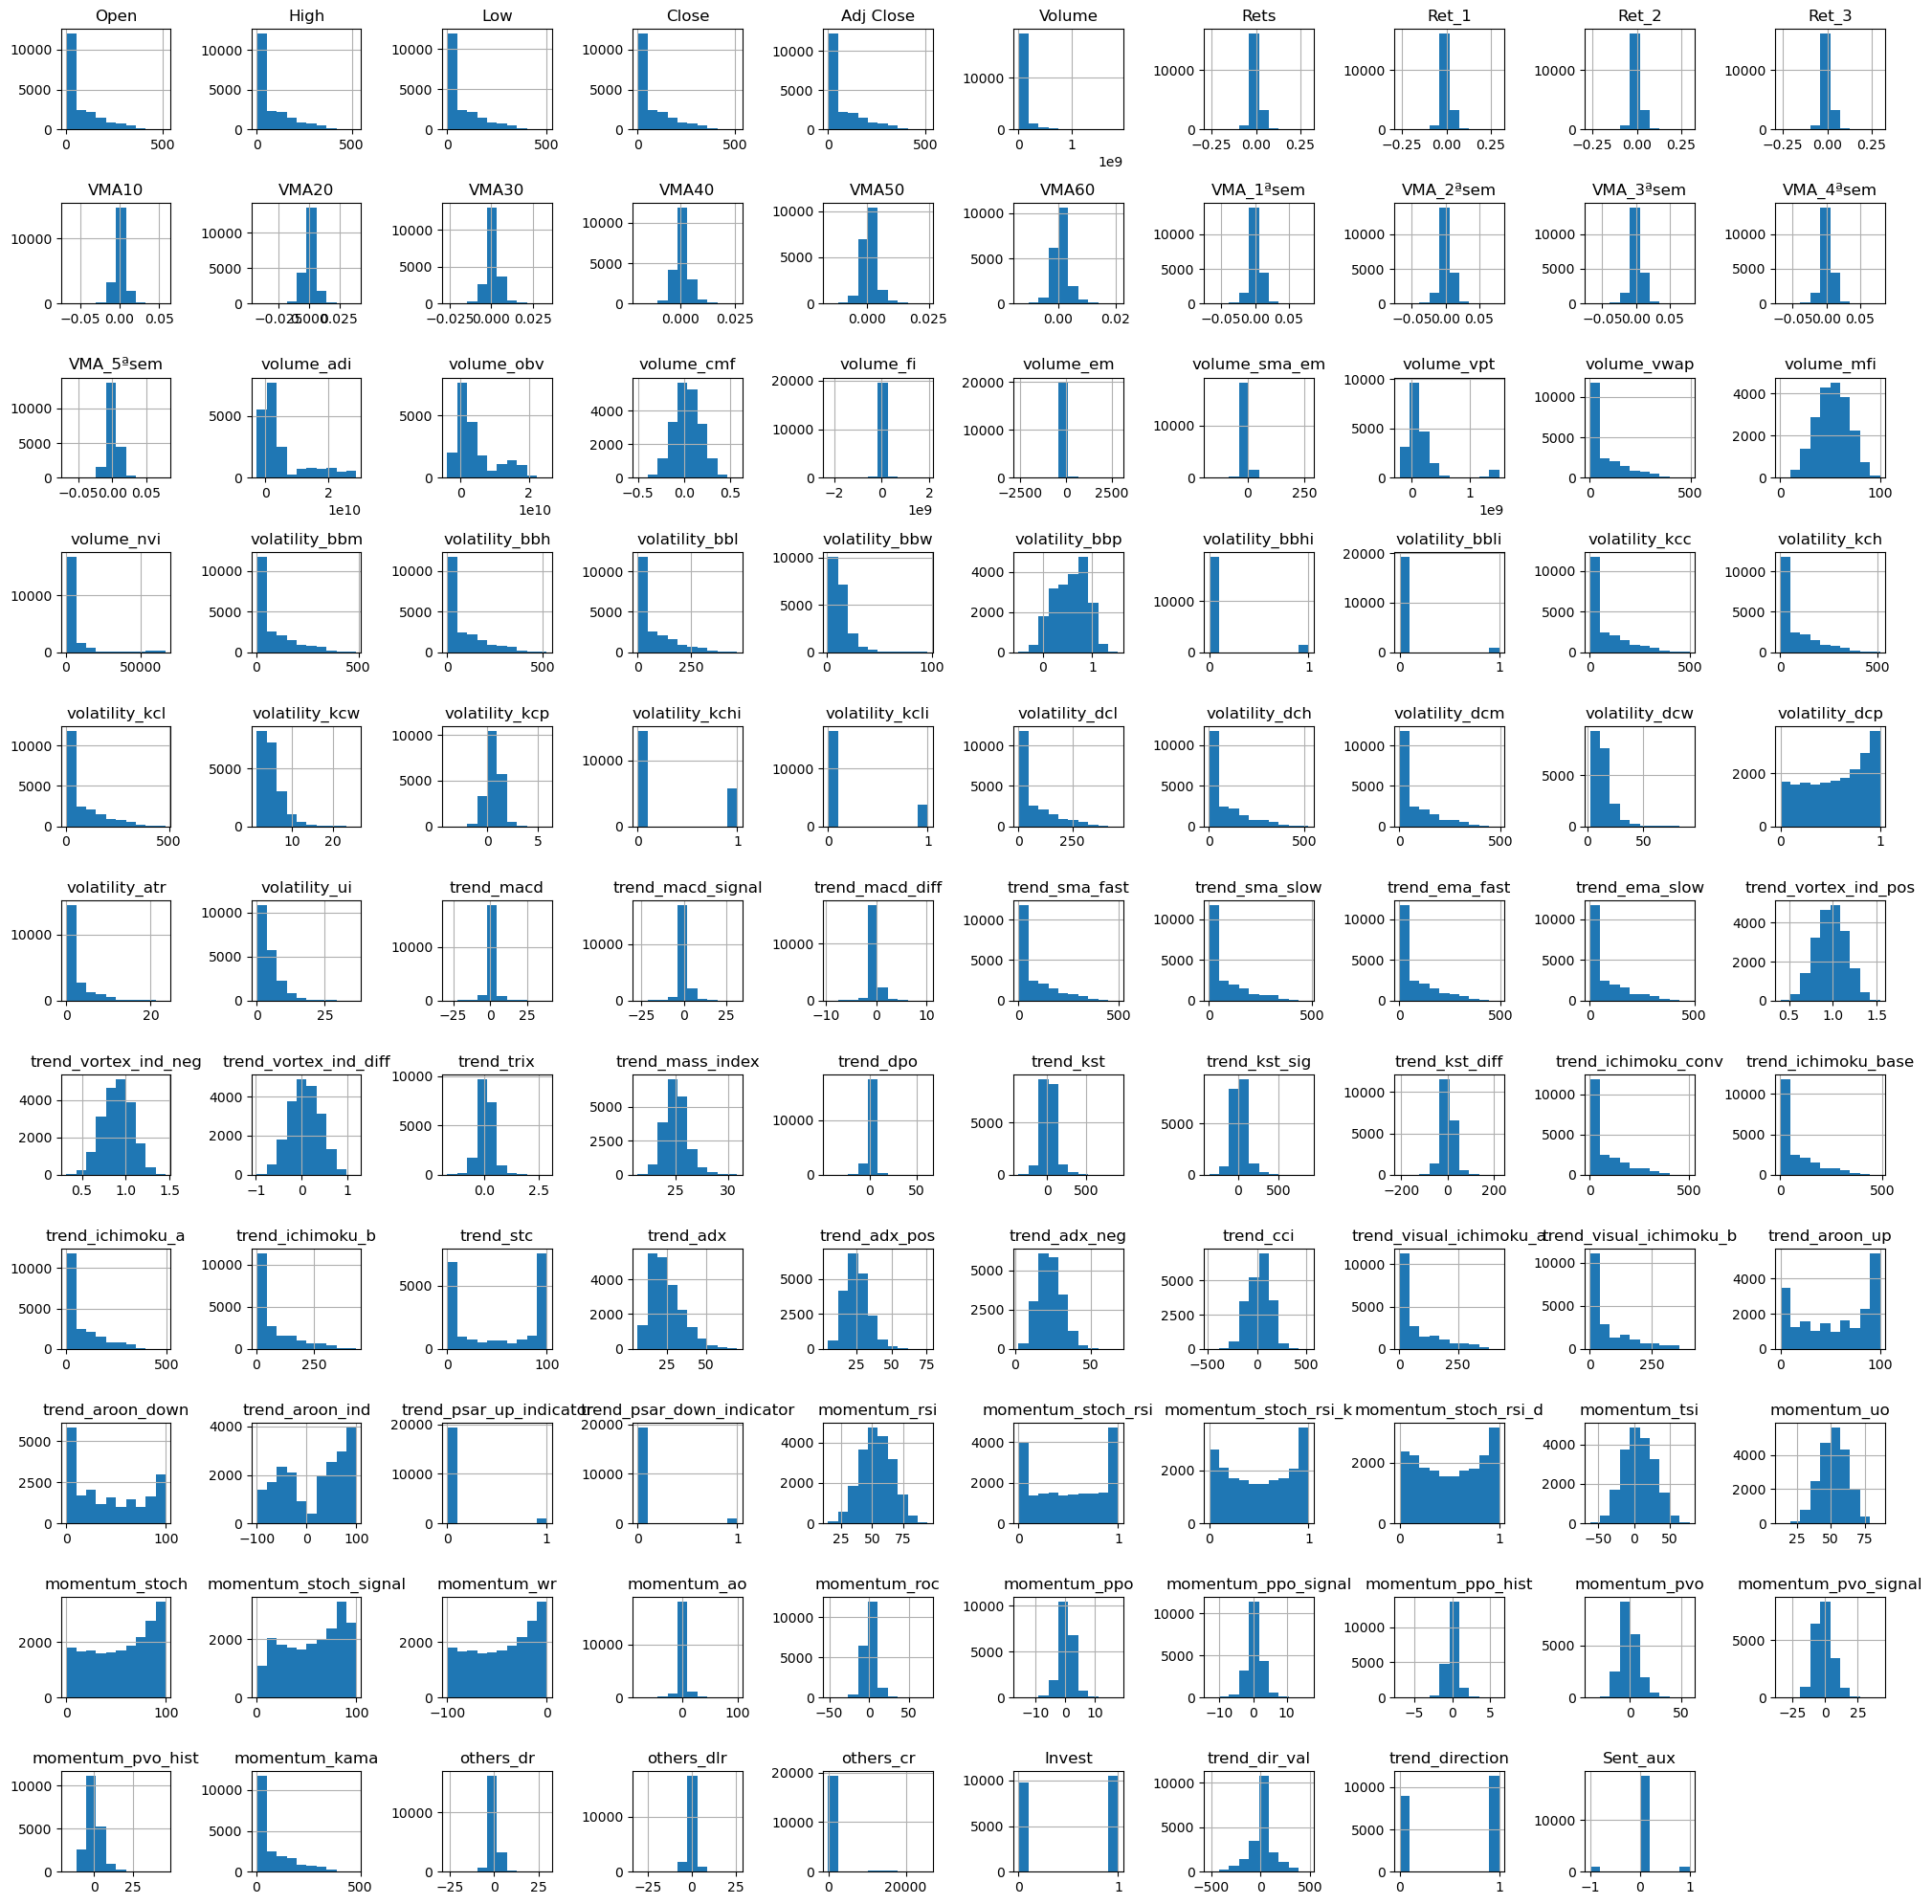

In [10]:
df_numeric = df.select_dtypes(include=['number'])
df_numeric.hist(figsize=(20, 20))
plt.tight_layout()
plt.show()

Ahora vamos a hacer de nuevo un histograma de todas las variable pero haciendo distinción entre las observaciones que toman el valor 1 y el valor 0 para la columna objetivo. De este modo prodremos ver, si los histogramas de una clase y otra son muy distintos, si hay alguna variable predictora capaz de dividir las clases bien.

Como nuestra intención es hacer un modelo para cada empresa vamos a dividir los datos según la empresa, de esta manera podremos ver que variables pueden tener más influencia en cada modelo.

####################     AAPL      #####################


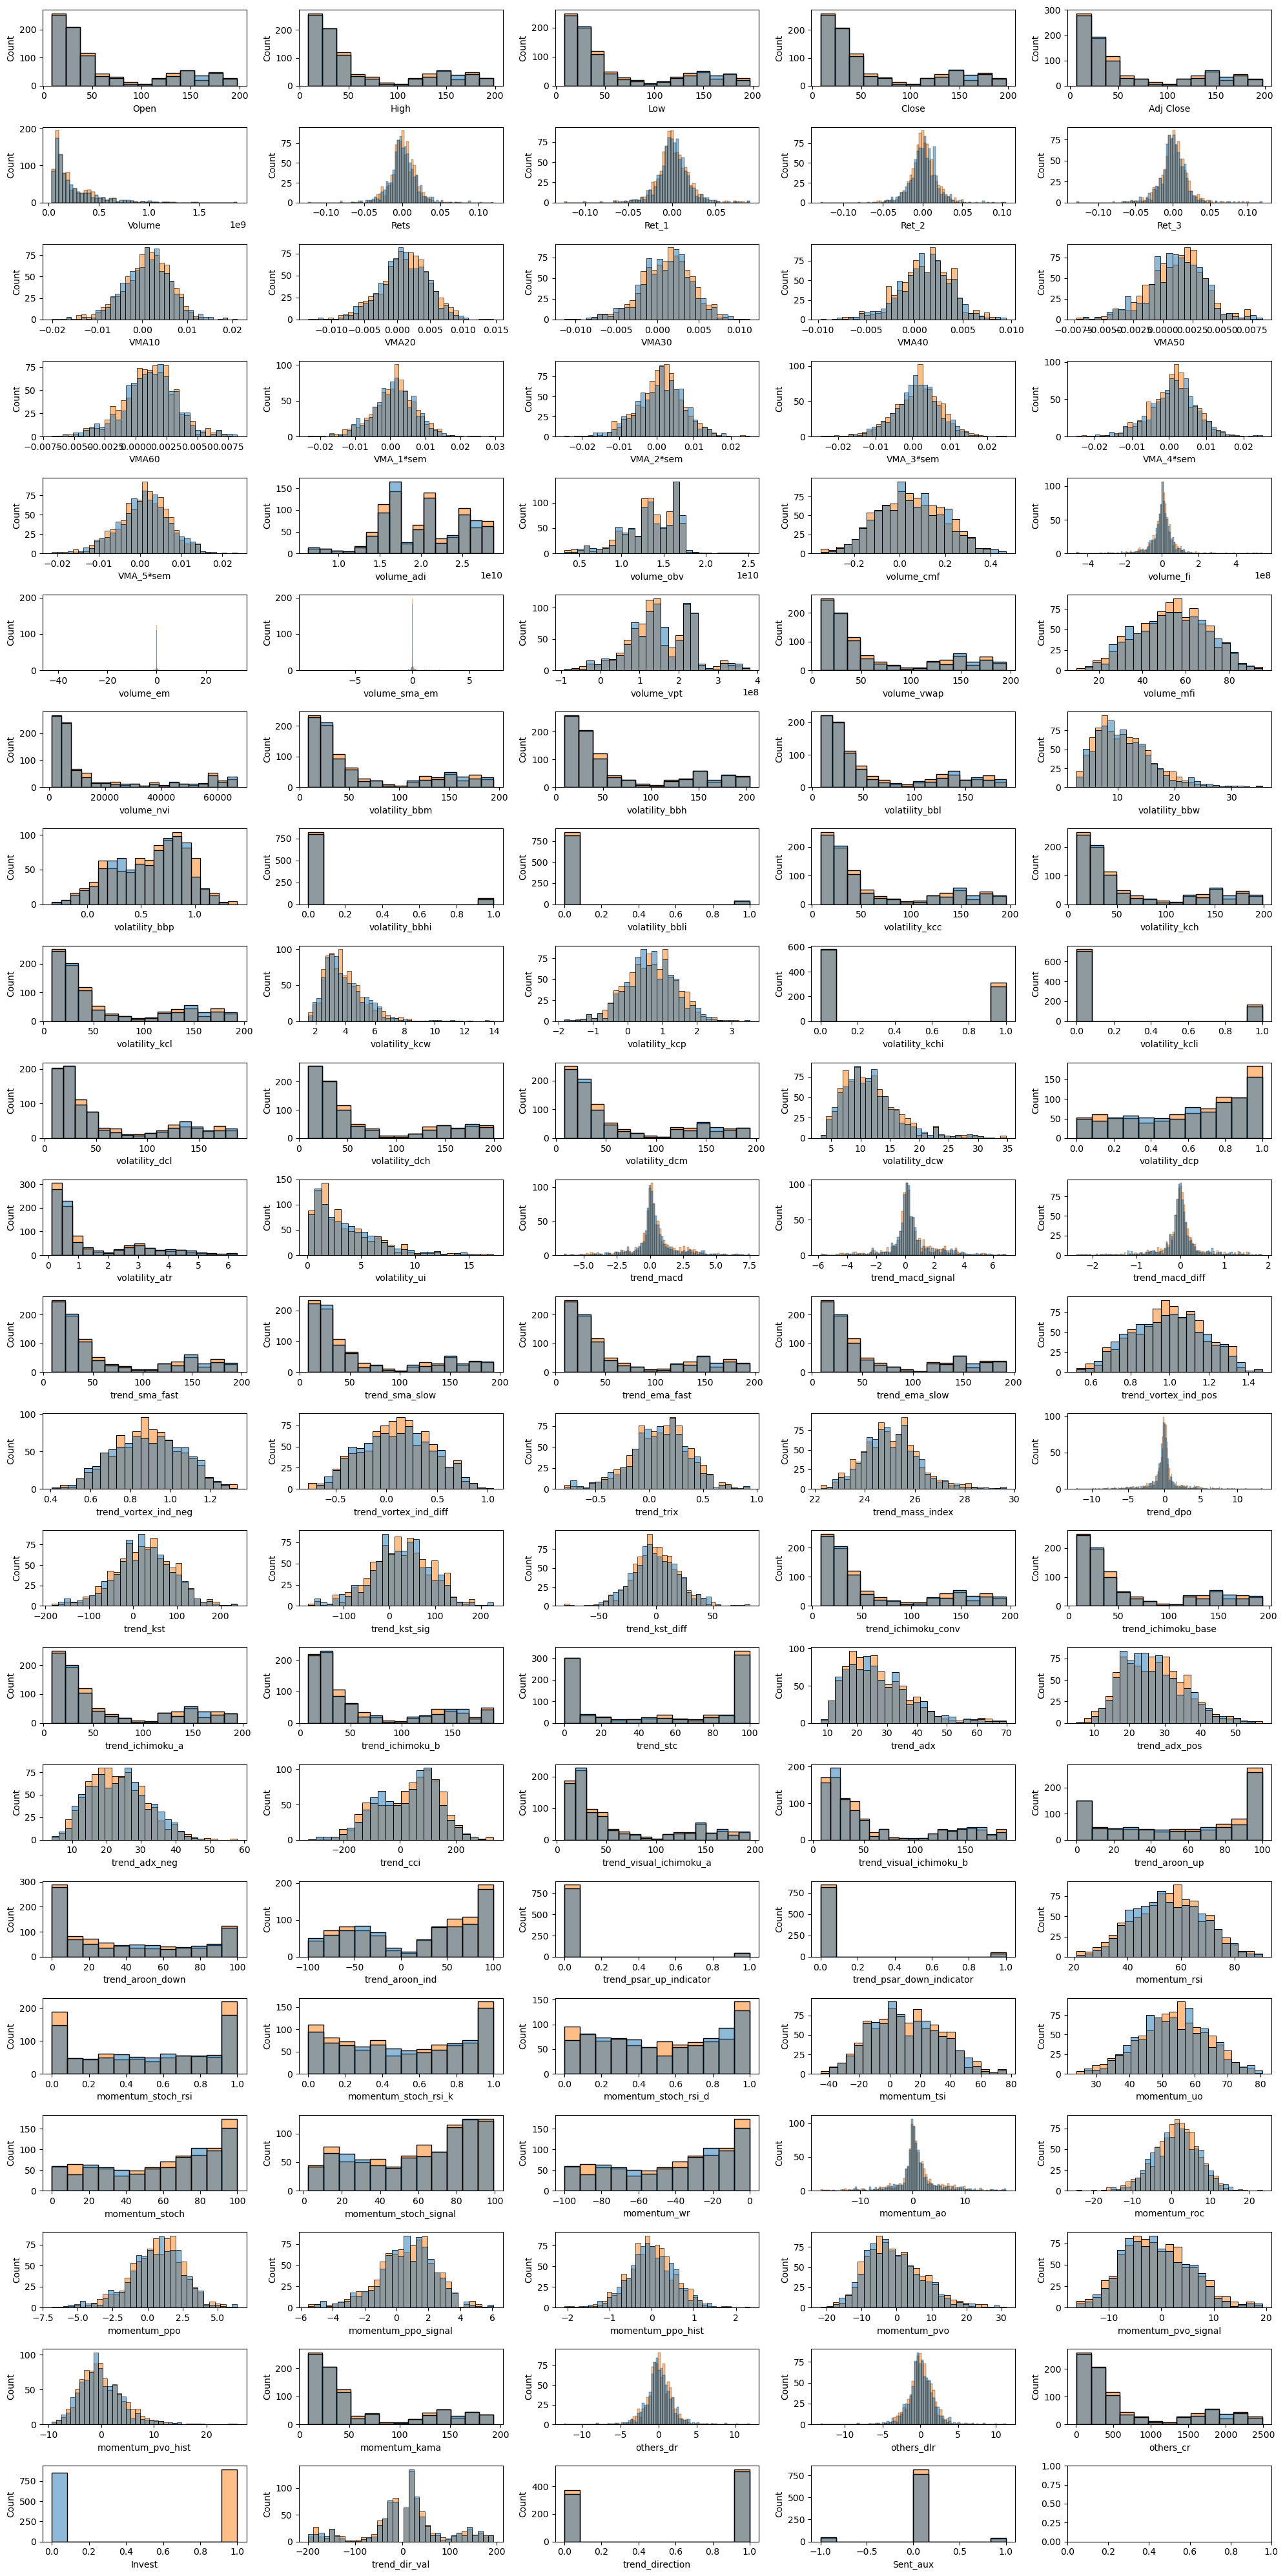

####################     F      #####################


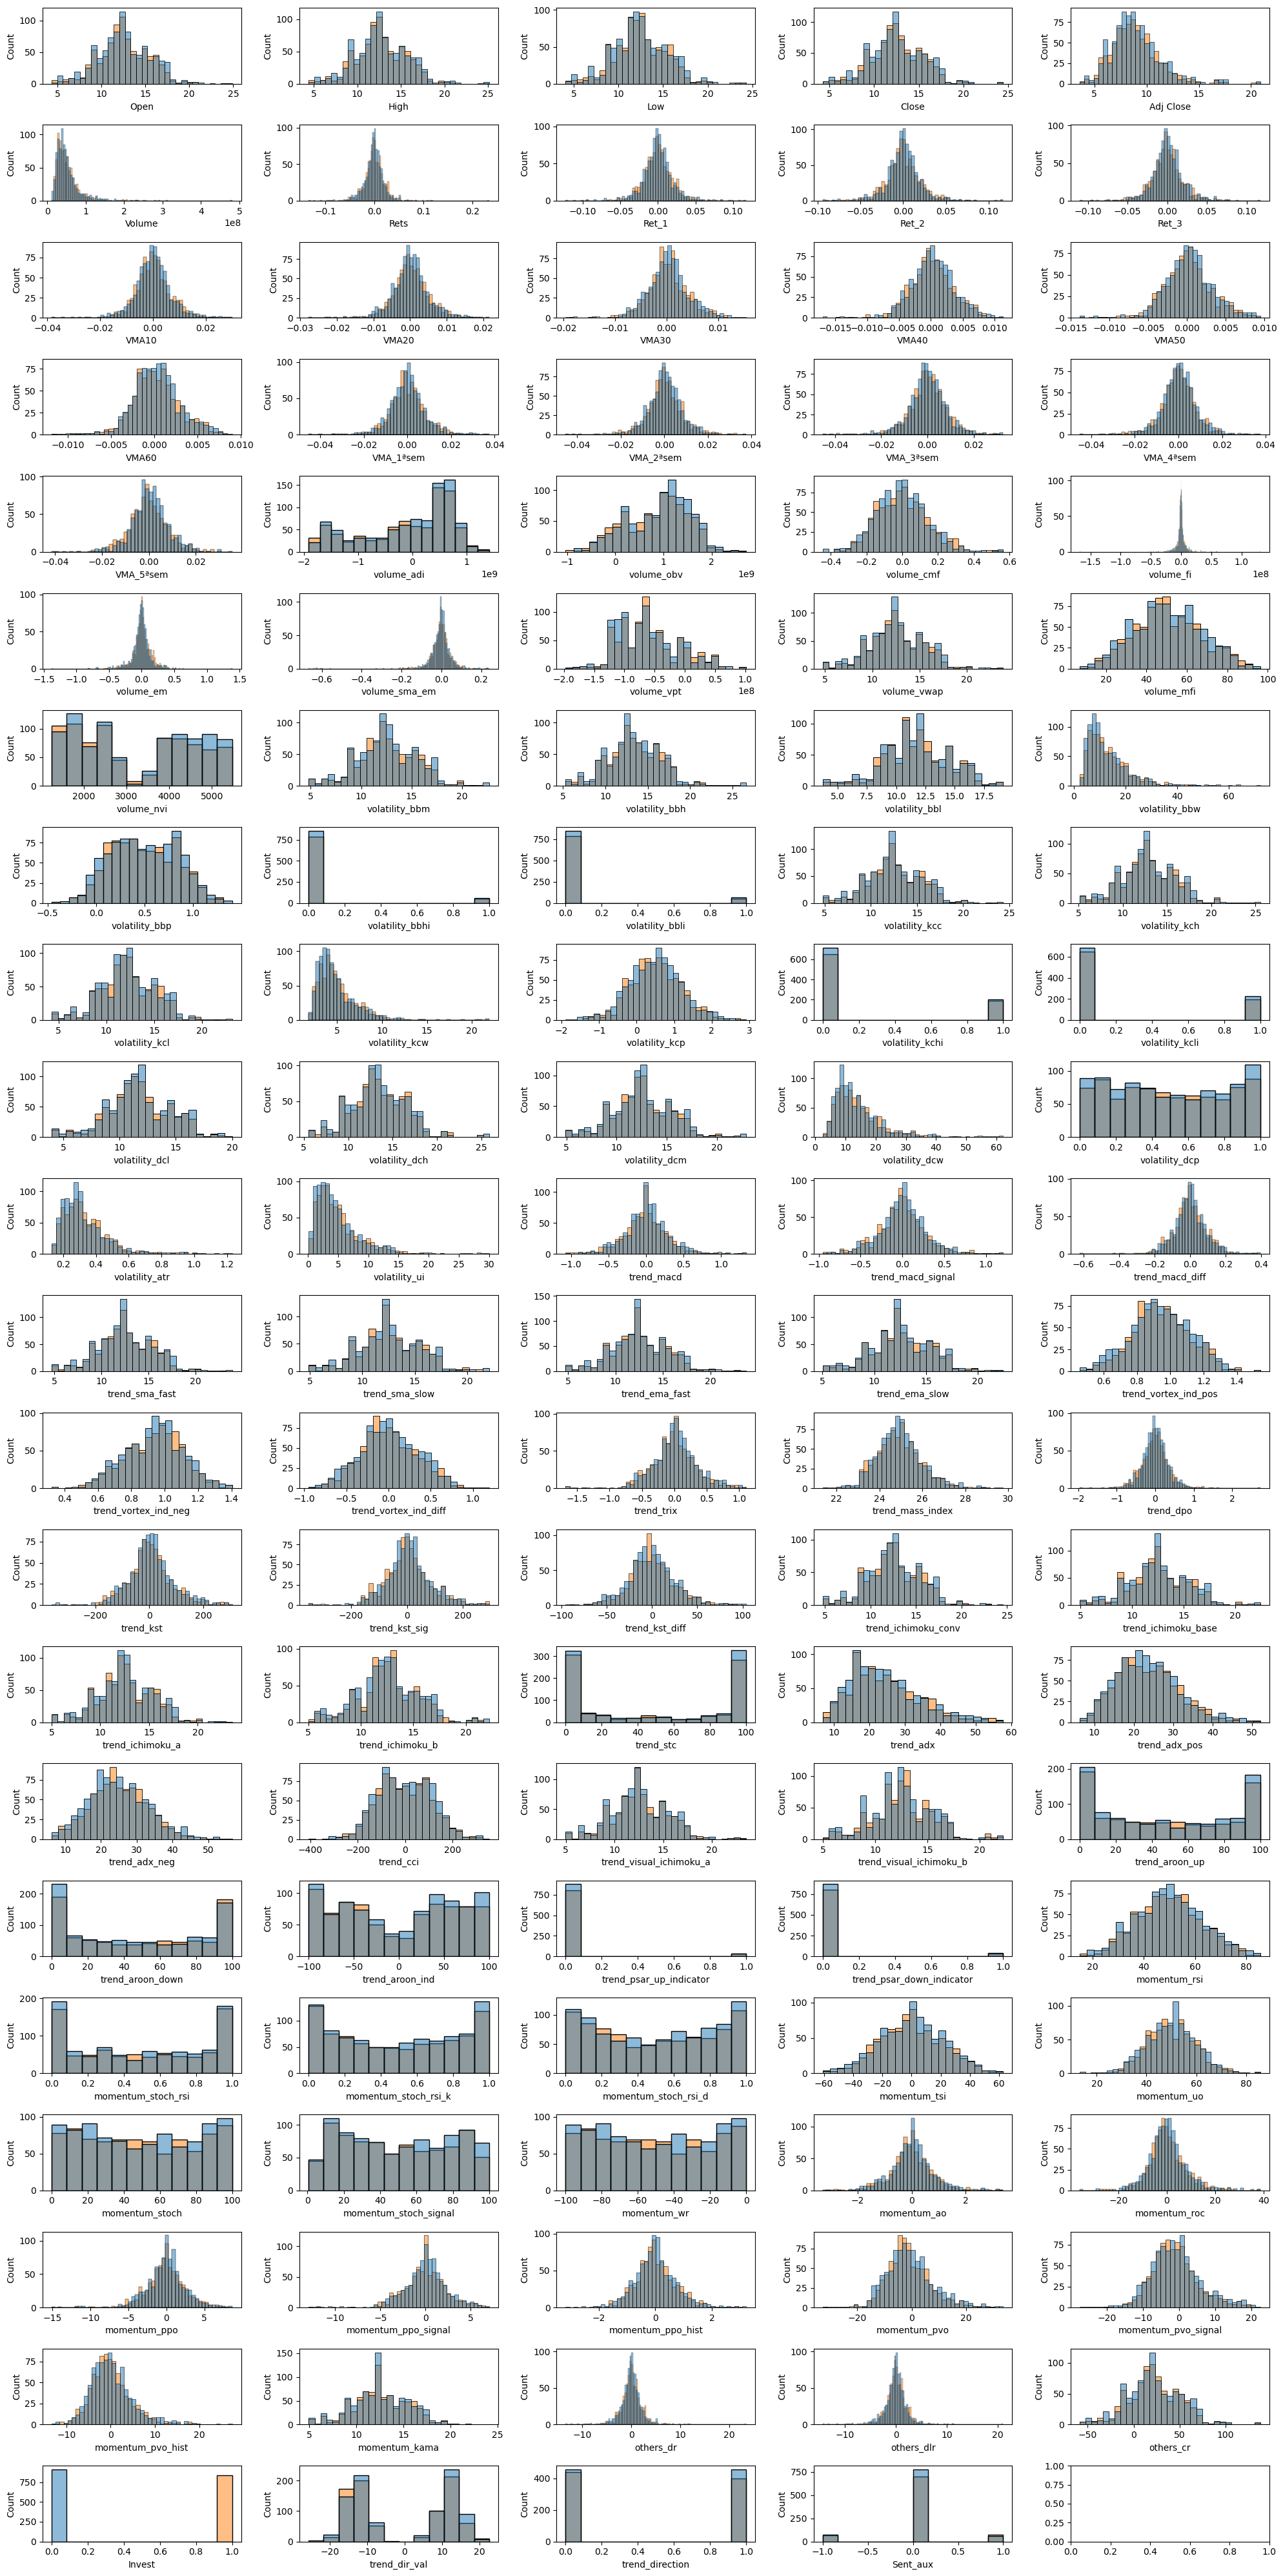

####################     GOOG      #####################


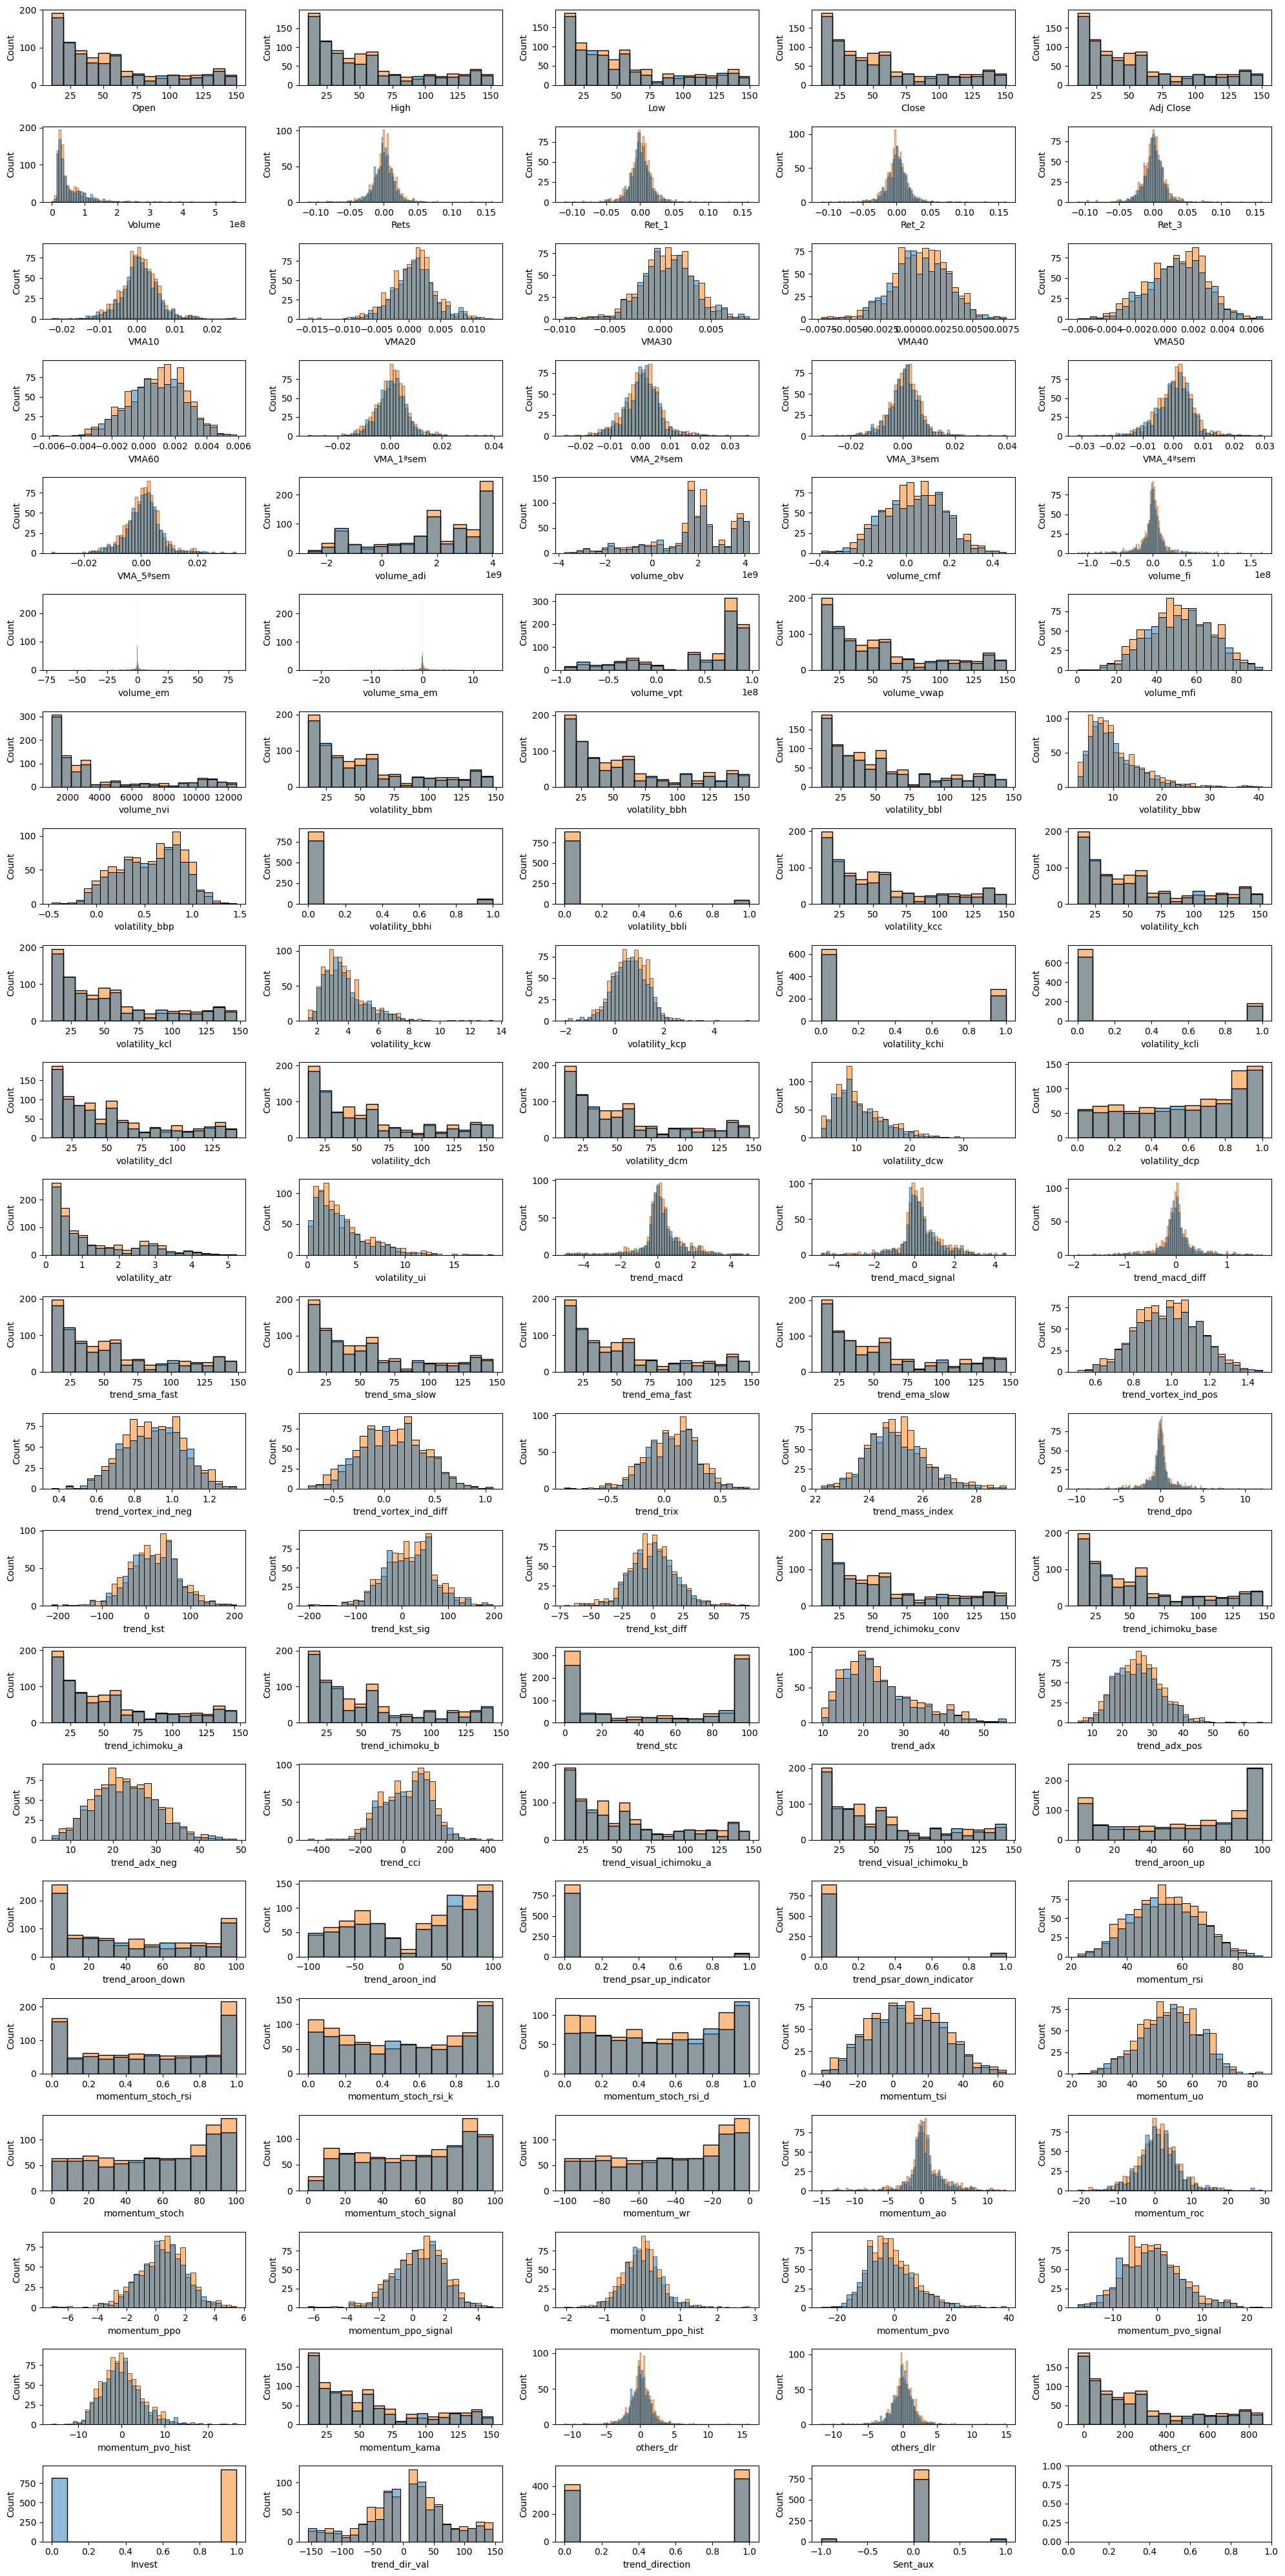

####################     META      #####################


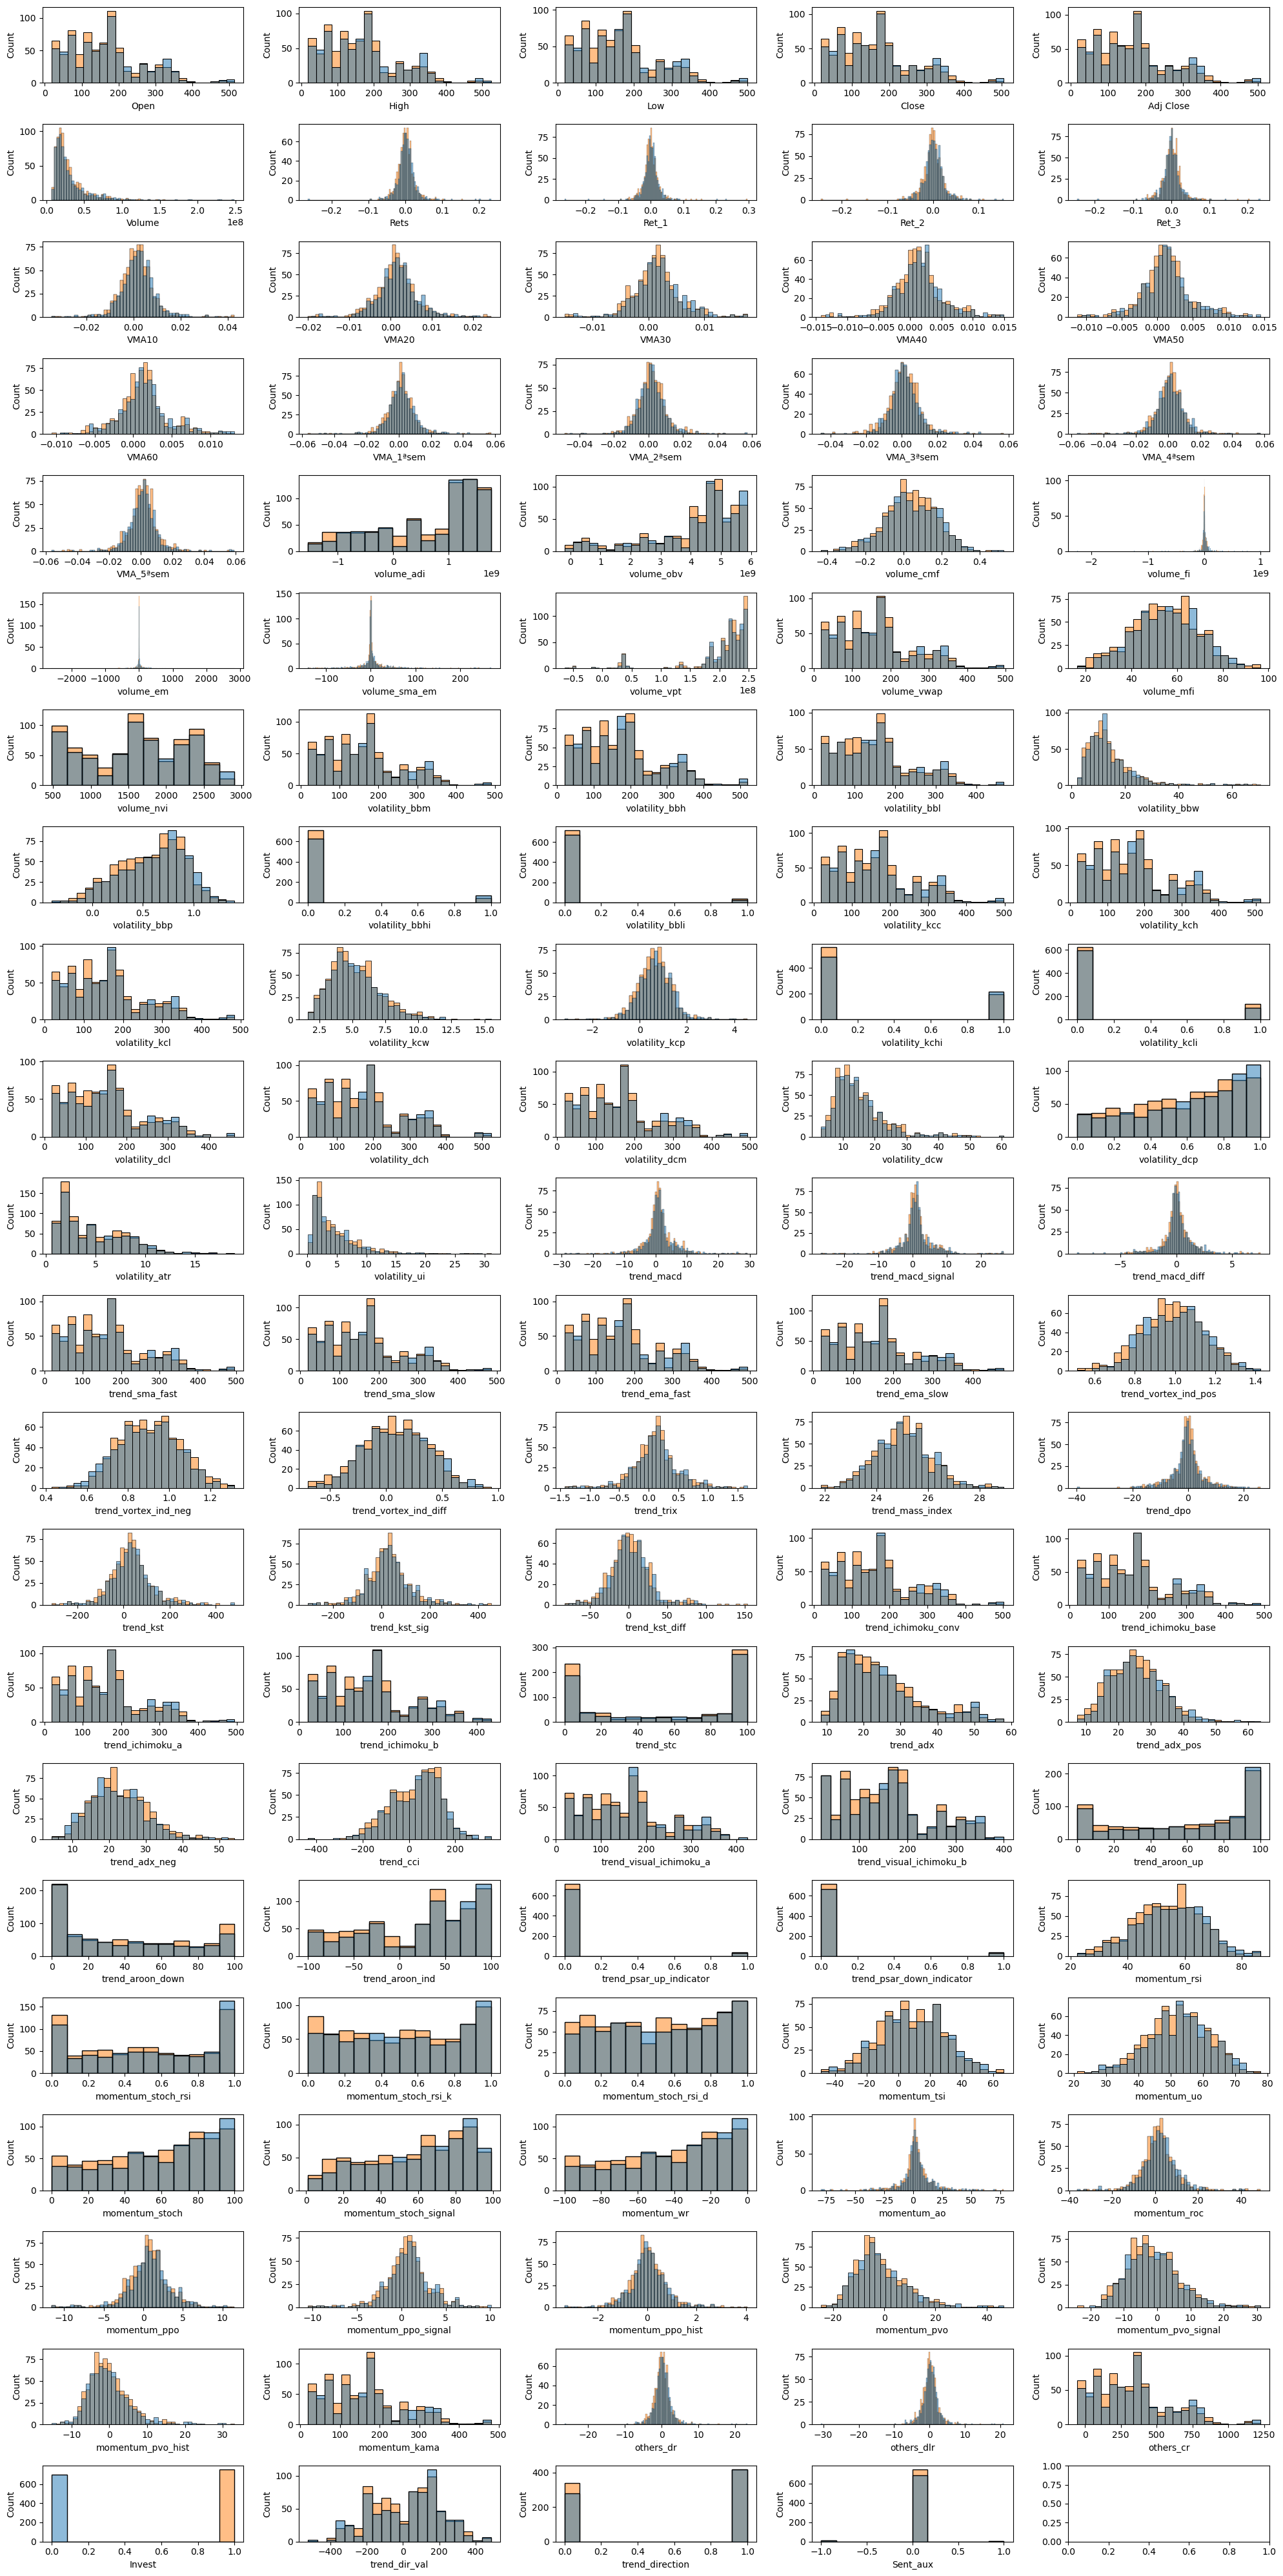

####################     MSFT      #####################


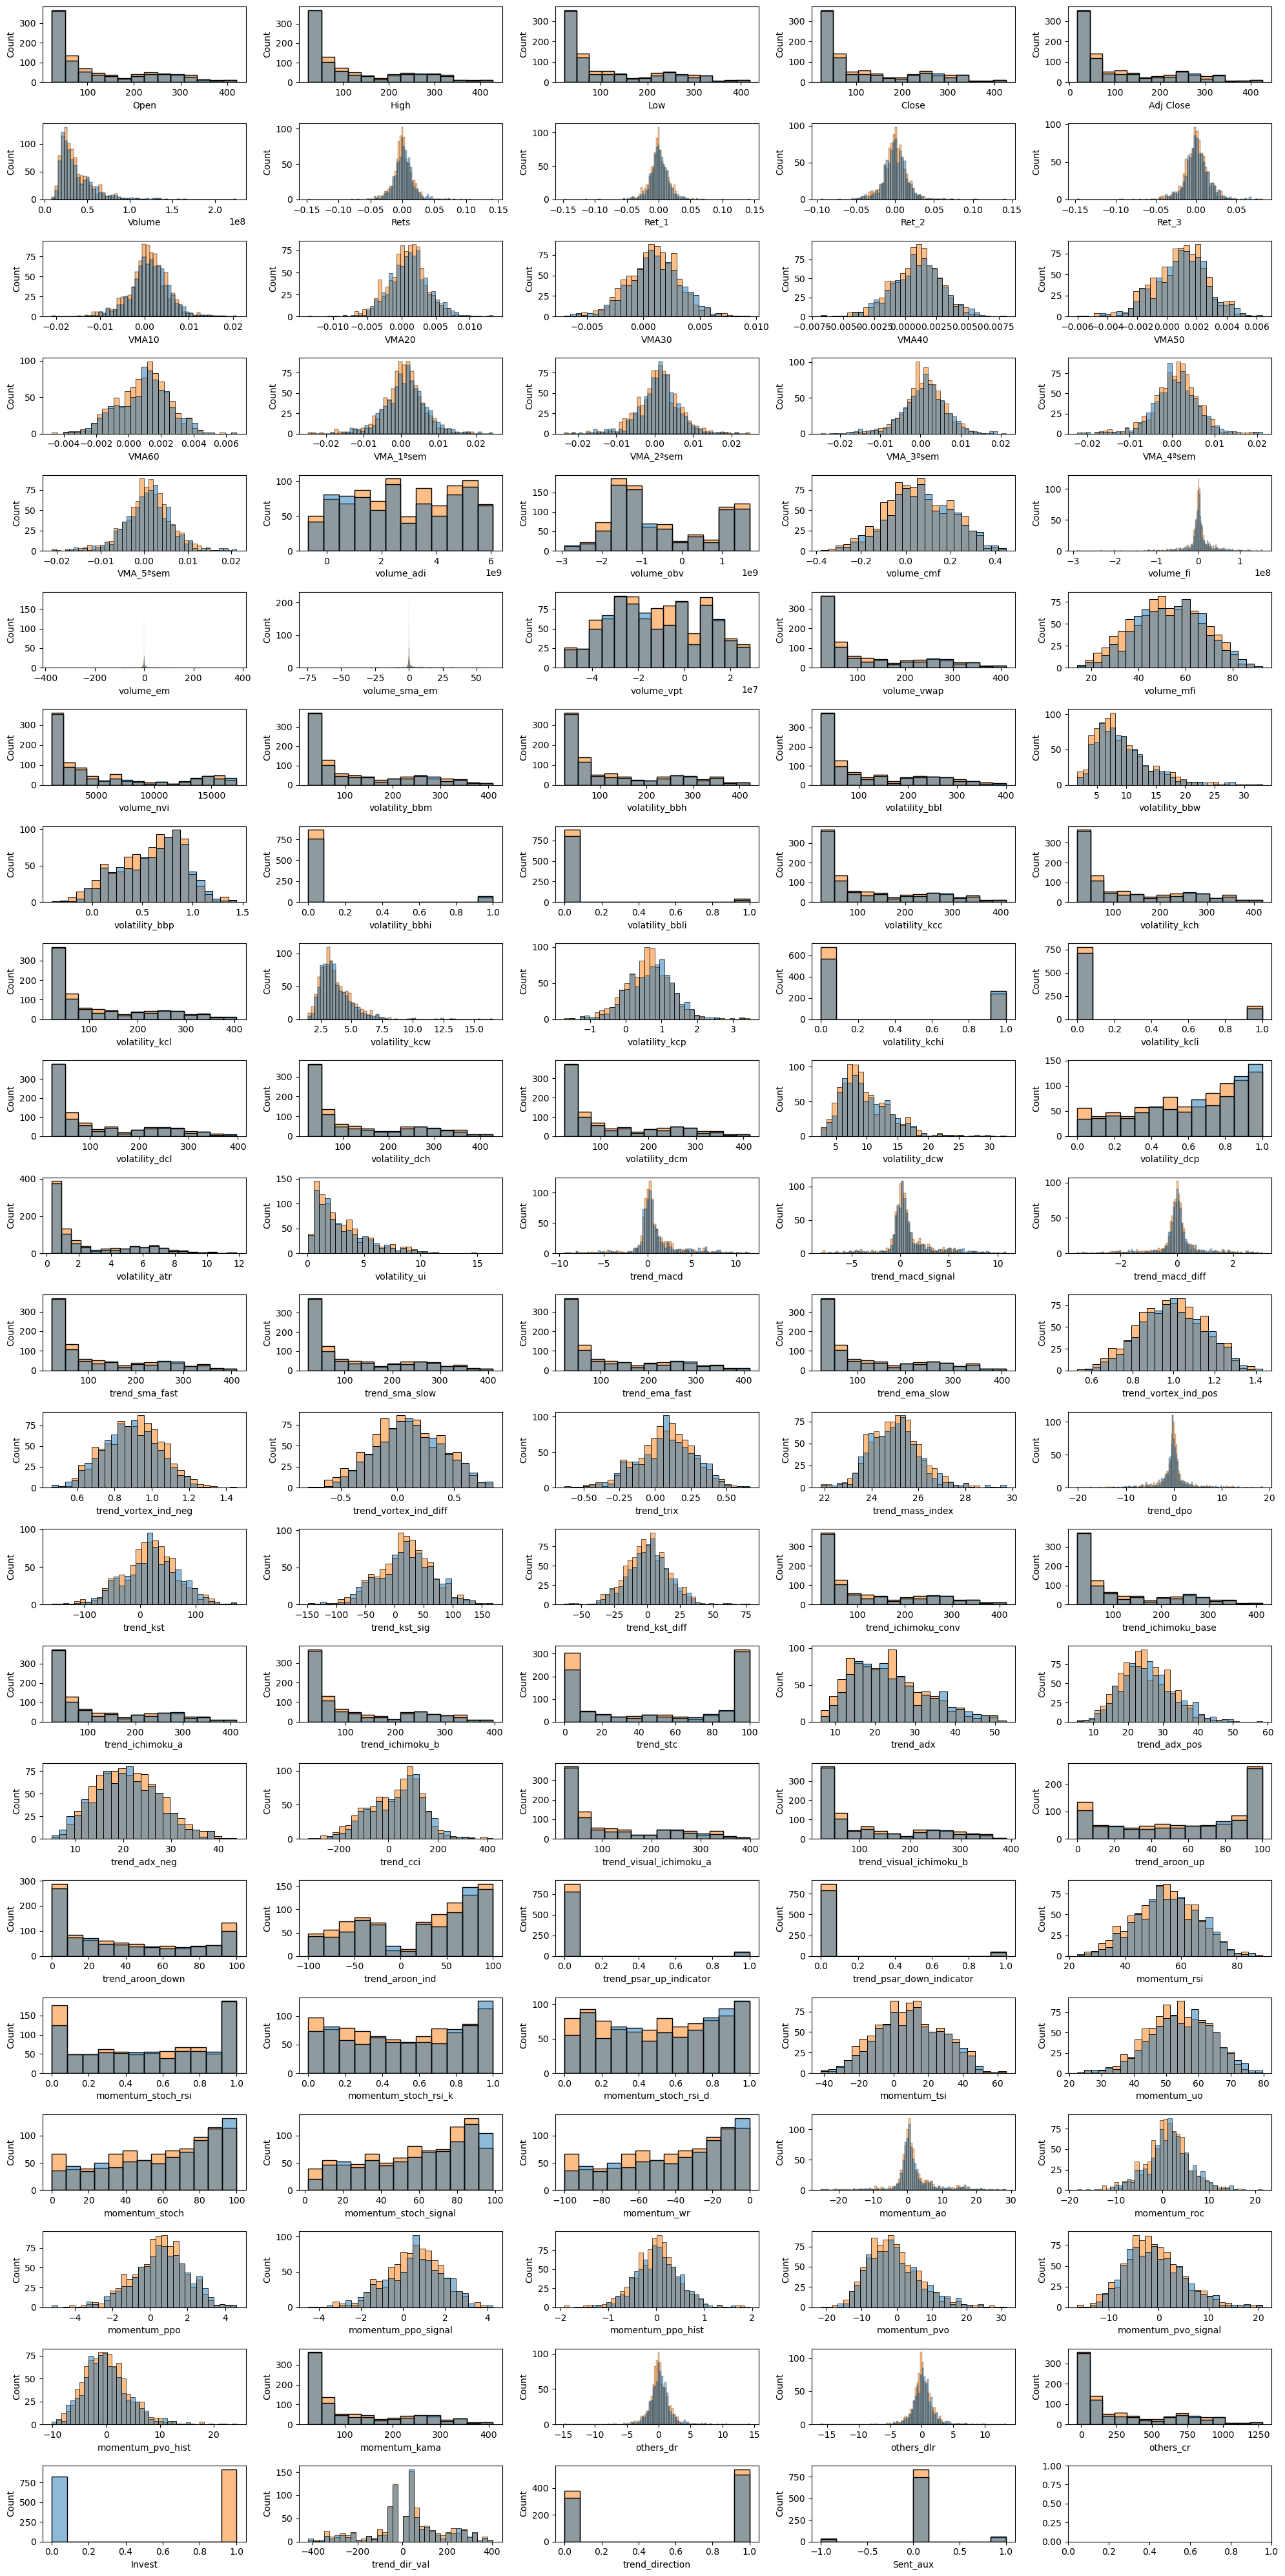

####################     TSLA      #####################


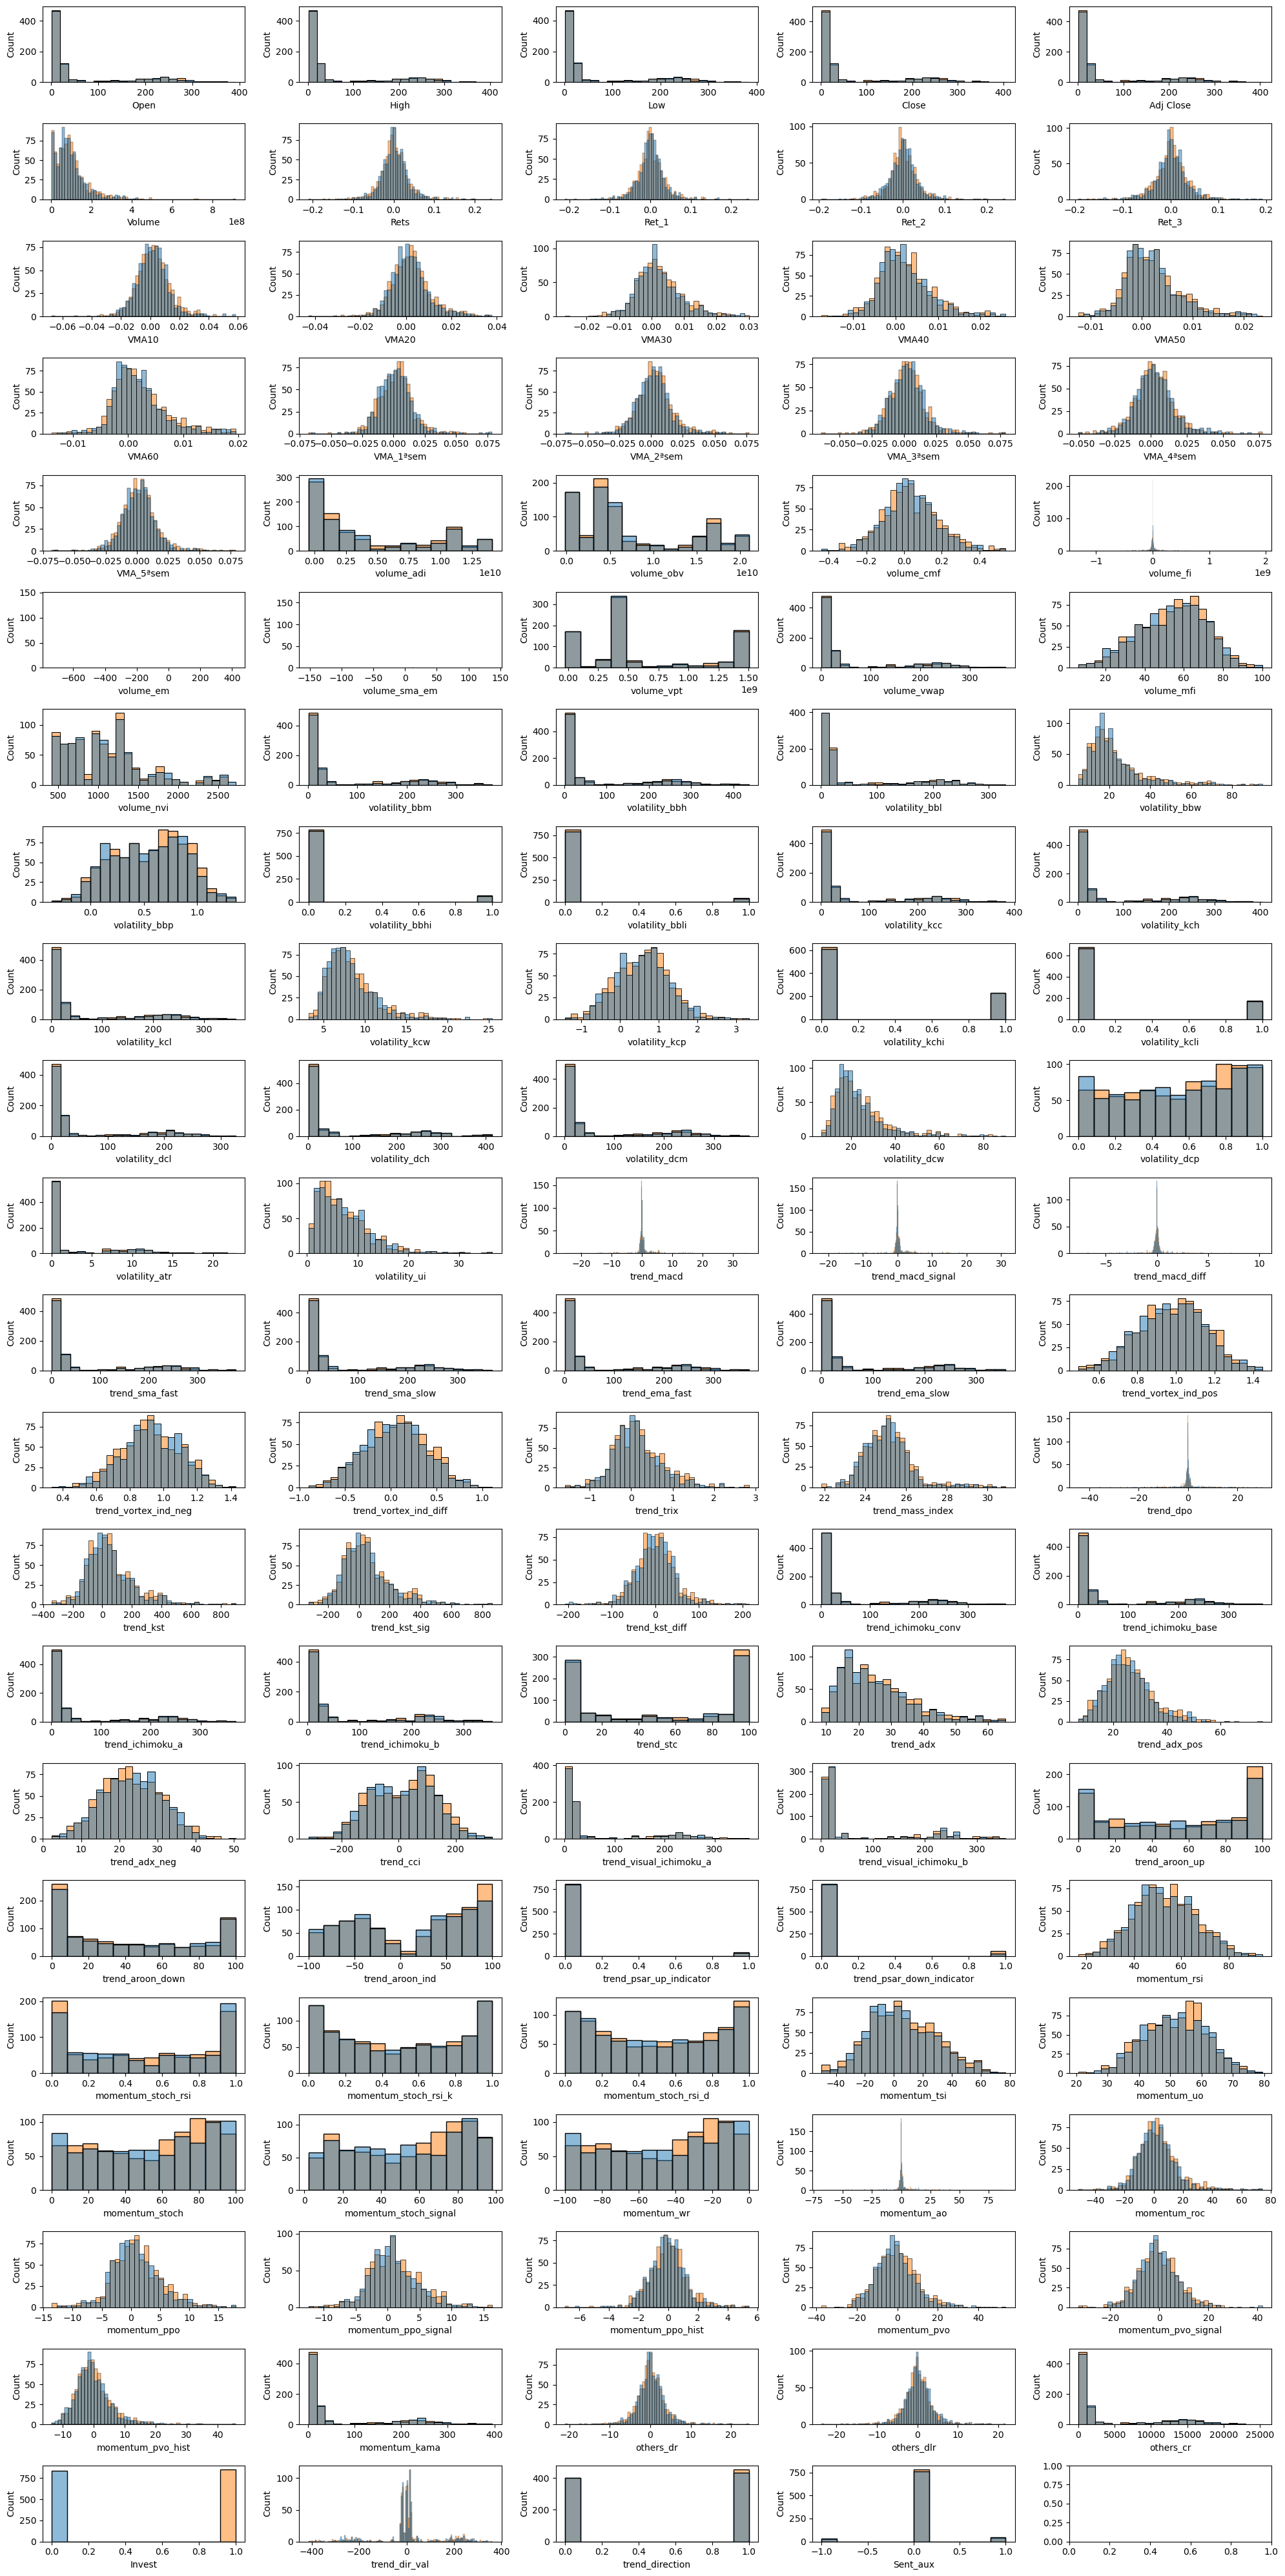

In [11]:
for s, g in df.groupby('Symbol'):
    print('####################    ', s, '     #####################')
    df_num = g.select_dtypes(include=['number'])
    df_sample = df_num.sample(frac=.5, random_state=42)
    fig, axes = plt.subplots(22, 5, figsize=(20, 40))
    i, j = 0, 0
    for col in df_sample:
        sns.histplot(data=df_sample, x=col, hue='Invest', ax=axes[i, j], legend=False)
        j += 1
        if j == 5:
            j = 0
            i += 1
    plt.tight_layout()
    plt.show()

En este gráfico podemos ver en azul el histograma de la clase ***Invest=0*** (no hay que invertir)  y en naranja el histograma de la clase ***Invest=1*** (si hay que invertir). Podemos ver que los histogramas naranjas y azules son muy parecidos para todas las variables predictoras por lo que no hay ninguna variable que sea capaz de separar las clases muy bien.

En general, parece que el histograma naranjas es un poco más alto que el azul, lo que quiere decir que hay más días en los que la variable objetivo crece que en los que decrece.

Vamos a ver este hecho con diagrama de pastel

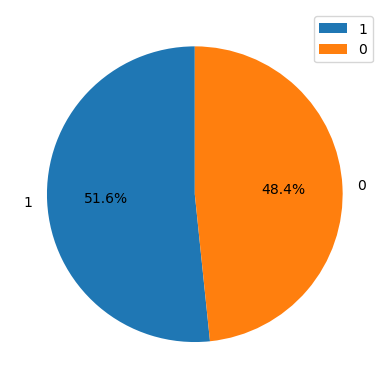

In [12]:
plt.pie(df_numeric['Invest'].value_counts(), labels=df_numeric['Invest'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.legend(loc='best')
plt.show()

Podemos ver que la clase está un poco desbalenceada, hay más días en los que las acciones sueben que días en los que bajan.

Ahora vamos a diferenciar entre las 6 empresas.

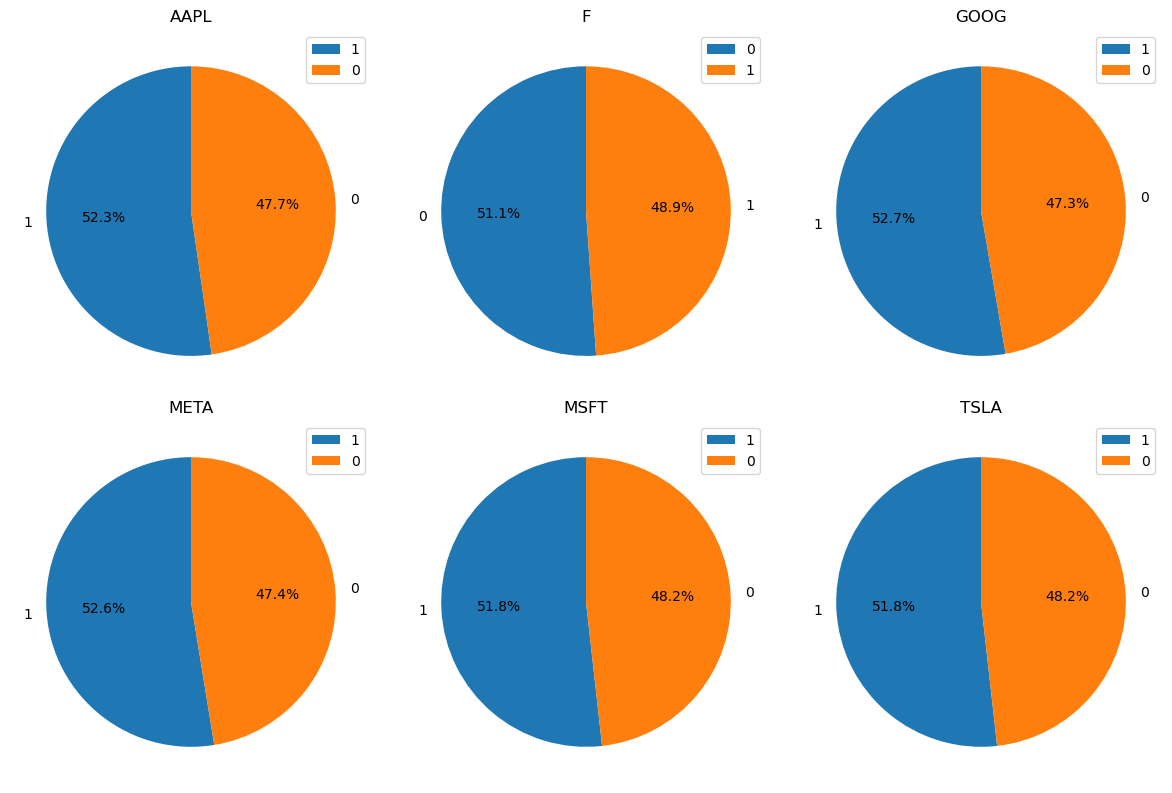

In [13]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
i, j = 0, 0
for s, g in df.groupby('Symbol'):
    axes[i, j].pie(g['Invest'].value_counts(), labels=g['Invest'].value_counts().index, autopct='%1.1f%%', startangle=90)
    axes[i, j].legend(loc='best')
    axes[i, j].set_title(s)
    
    j += 1
    if j == 3:
        j = 0
        i += 1
    
plt.tight_layout()
plt.show()    

Vemos que el porcentaje de subidad y bajadas de las acciones es similar para las 6 empresas.

Vamos a ver ahora el porcentaje de subidas vs porcentaje de bajadas según el año. Vamos a hacer intervalos de 2 años.

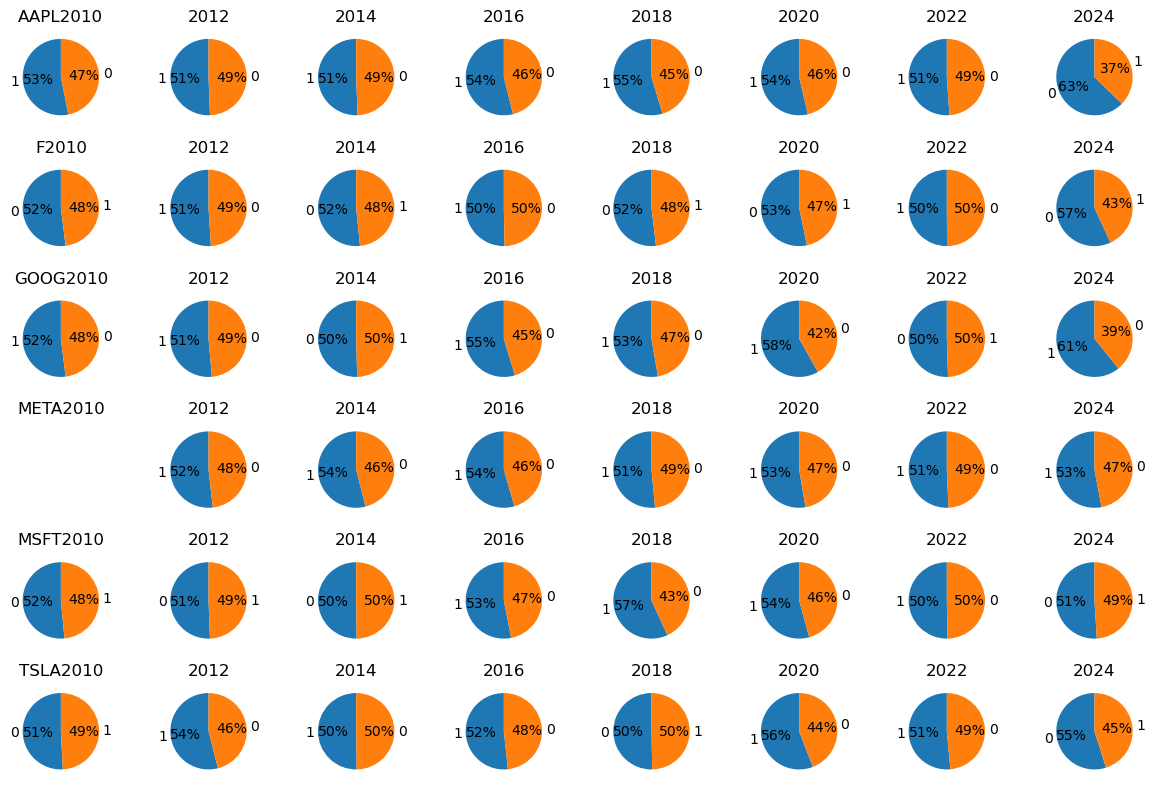

In [14]:
fig, axes = plt.subplots(6, 8, figsize=(12, 8))
i = 0
for s, g in df.groupby('Symbol'):
    j = 0
    for a in range(2010, 2025, 2):
        anyo_min = str(a)+'-01-01'
        anyo_max = str(a + 2)+'-01-01'
        aux = g[(g['Date'] > anyo_min) & (g['Date'] < anyo_max)]['Invest'].value_counts()
        axes[i, j].pie(aux, labels=aux.index, autopct='%1.0f%%', startangle=90)
        axes[i, j].set_title(str(a))
        if j == 0:
            axes[i, j].set_title(s + str(a))
        j += 1
    
    i += 1
    
plt.tight_layout()
plt.show()    

Más o menos la proporción se mantiene constante. Me sorprende que en los años 2020 y 2021 (COVID) es uno de los años que más días subió el precio de las acciones. Por otro lado, entre 2022 y 2024 es el año que menos días hubo subidas.

En los pocos meses de 2024 la tendencia es muy buena. En general gran parte de los días las acciones suben.

Vamos a realizar un mapa de calor clustermap para ver las correlaciones de las variables entre sí y los grupos de variables que están altamente correlacionadas

C:\Users\hecto\anaconda3\lib\site-packages\seaborn\matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 2000x1200 with 0 Axes>

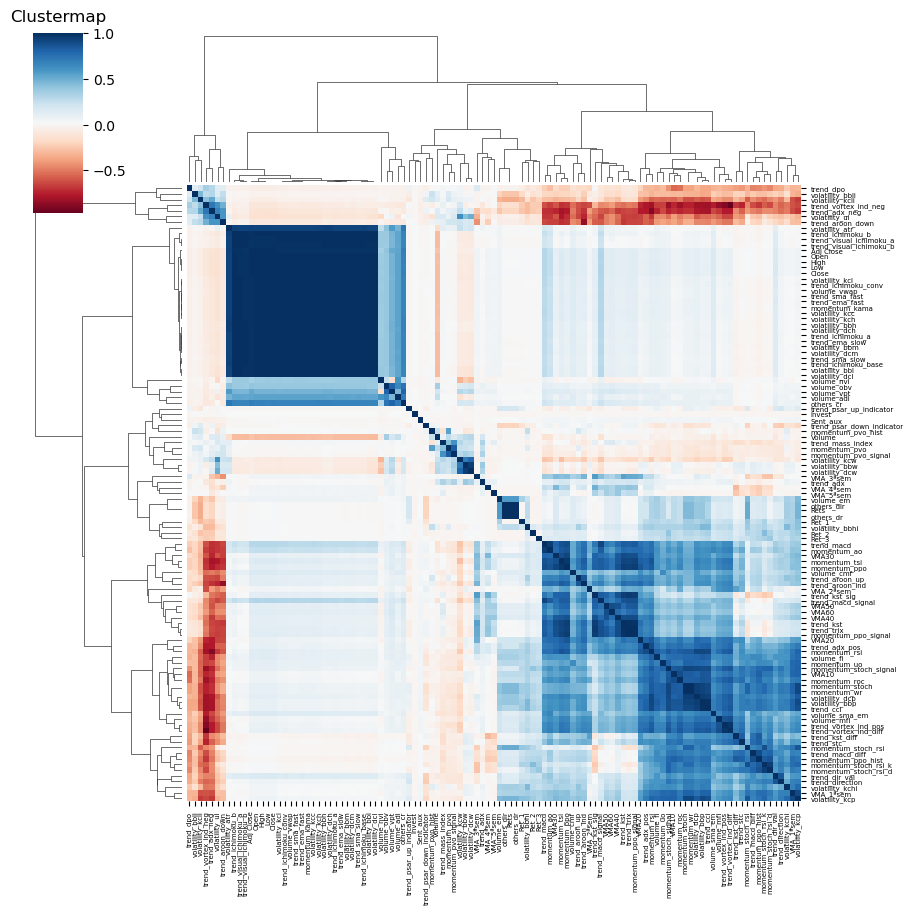

In [15]:
plt.figure(figsize=(20, 12))
g = sns.clustermap(df_numeric.corr(method='spearman'),
                   method='complete',
                   cmap='RdBu',
                   annot=False,
                   xticklabels=df_numeric.columns,
                   yticklabels=df_numeric.columns);
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=90, fontsize=5)
plt.setp(g.ax_heatmap.get_yticklabels(), fontsize=5)
plt.title(f'Clustermap', y=1.02)
plt.show();

En esta gráfica podemos ver 4 grupos claramente definidos. Hay un pequeño primer grupo de 7 variables con una corrlación considerable. Después hay un gran grupo de unas 20 variables con una correlación de 1 para gran parte de ellas. Probablemente haya que hacer un estudio más a fondo de este grupo y eliminar gran parte de estas variables. Luego hay un grupo de unas 25 columnas, entre las que se encuentra la variable respuesta ***Invest***, que no están demasiado correlacionadas con nada en general. Por último hay un gran grupo de unas 40 variables con bastante correlación positiva entre sí. Vamos a ver estos 4 grupos más detalladamente.

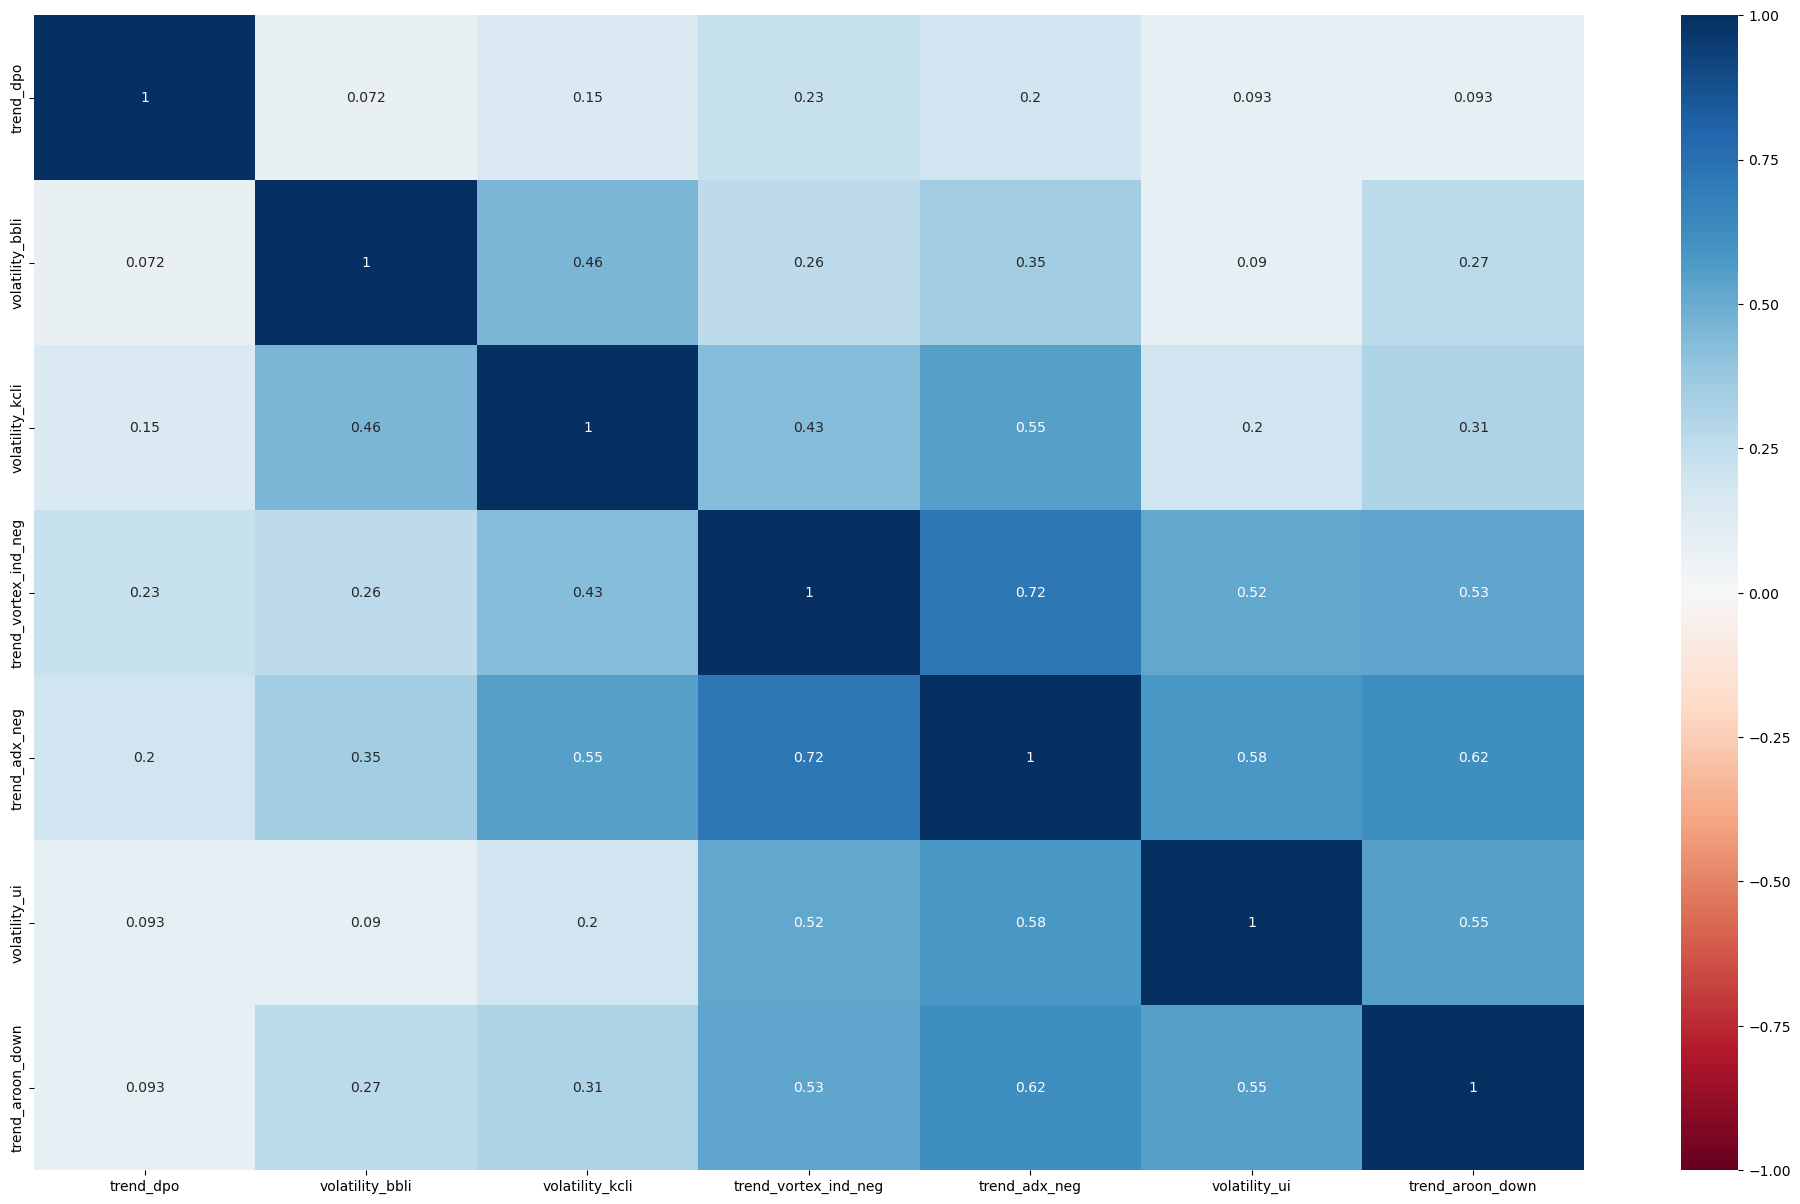

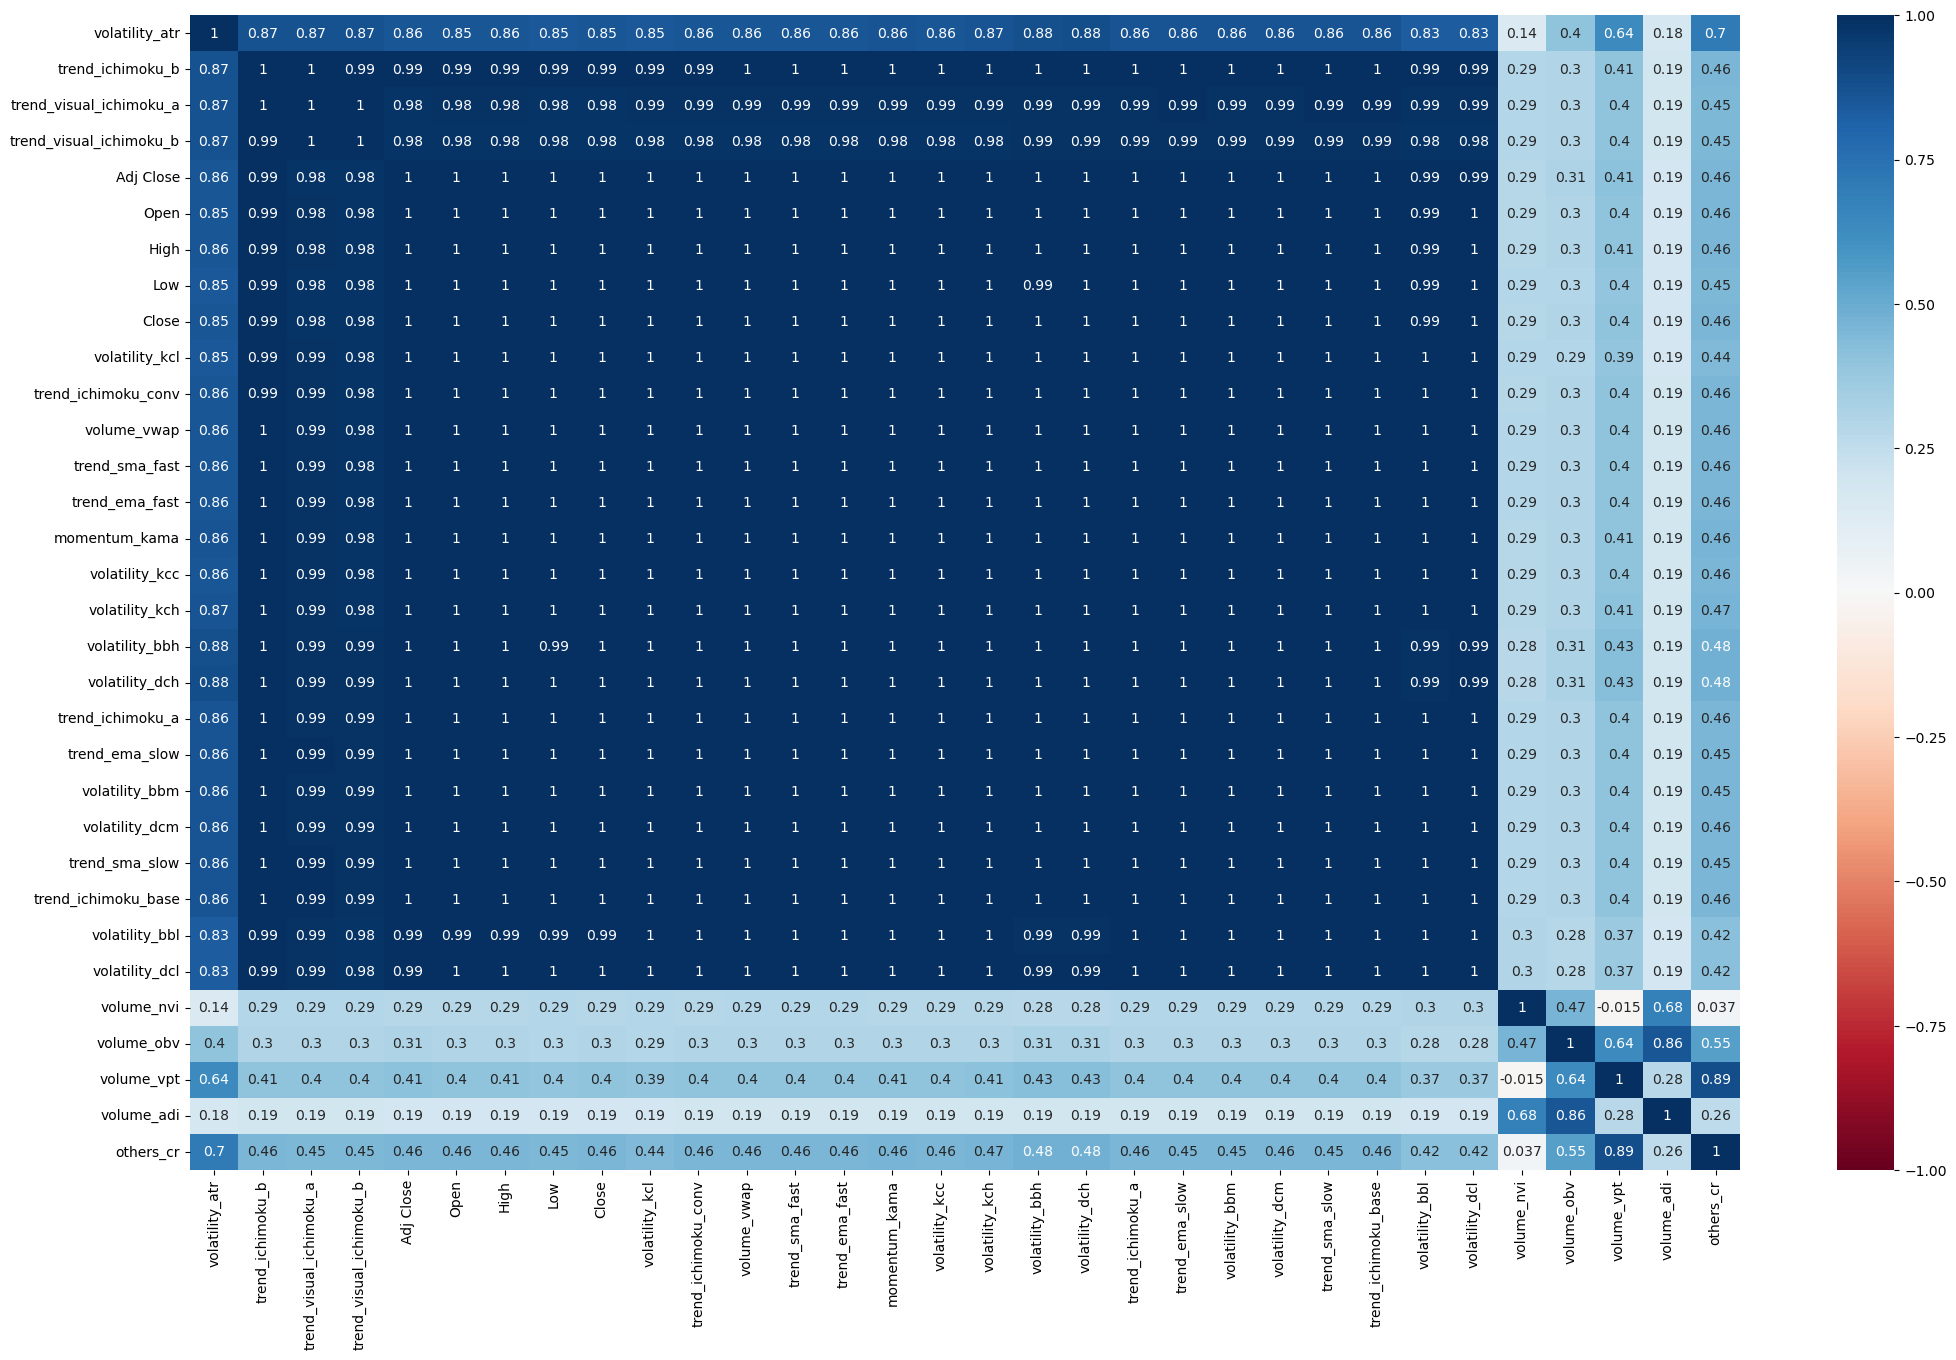

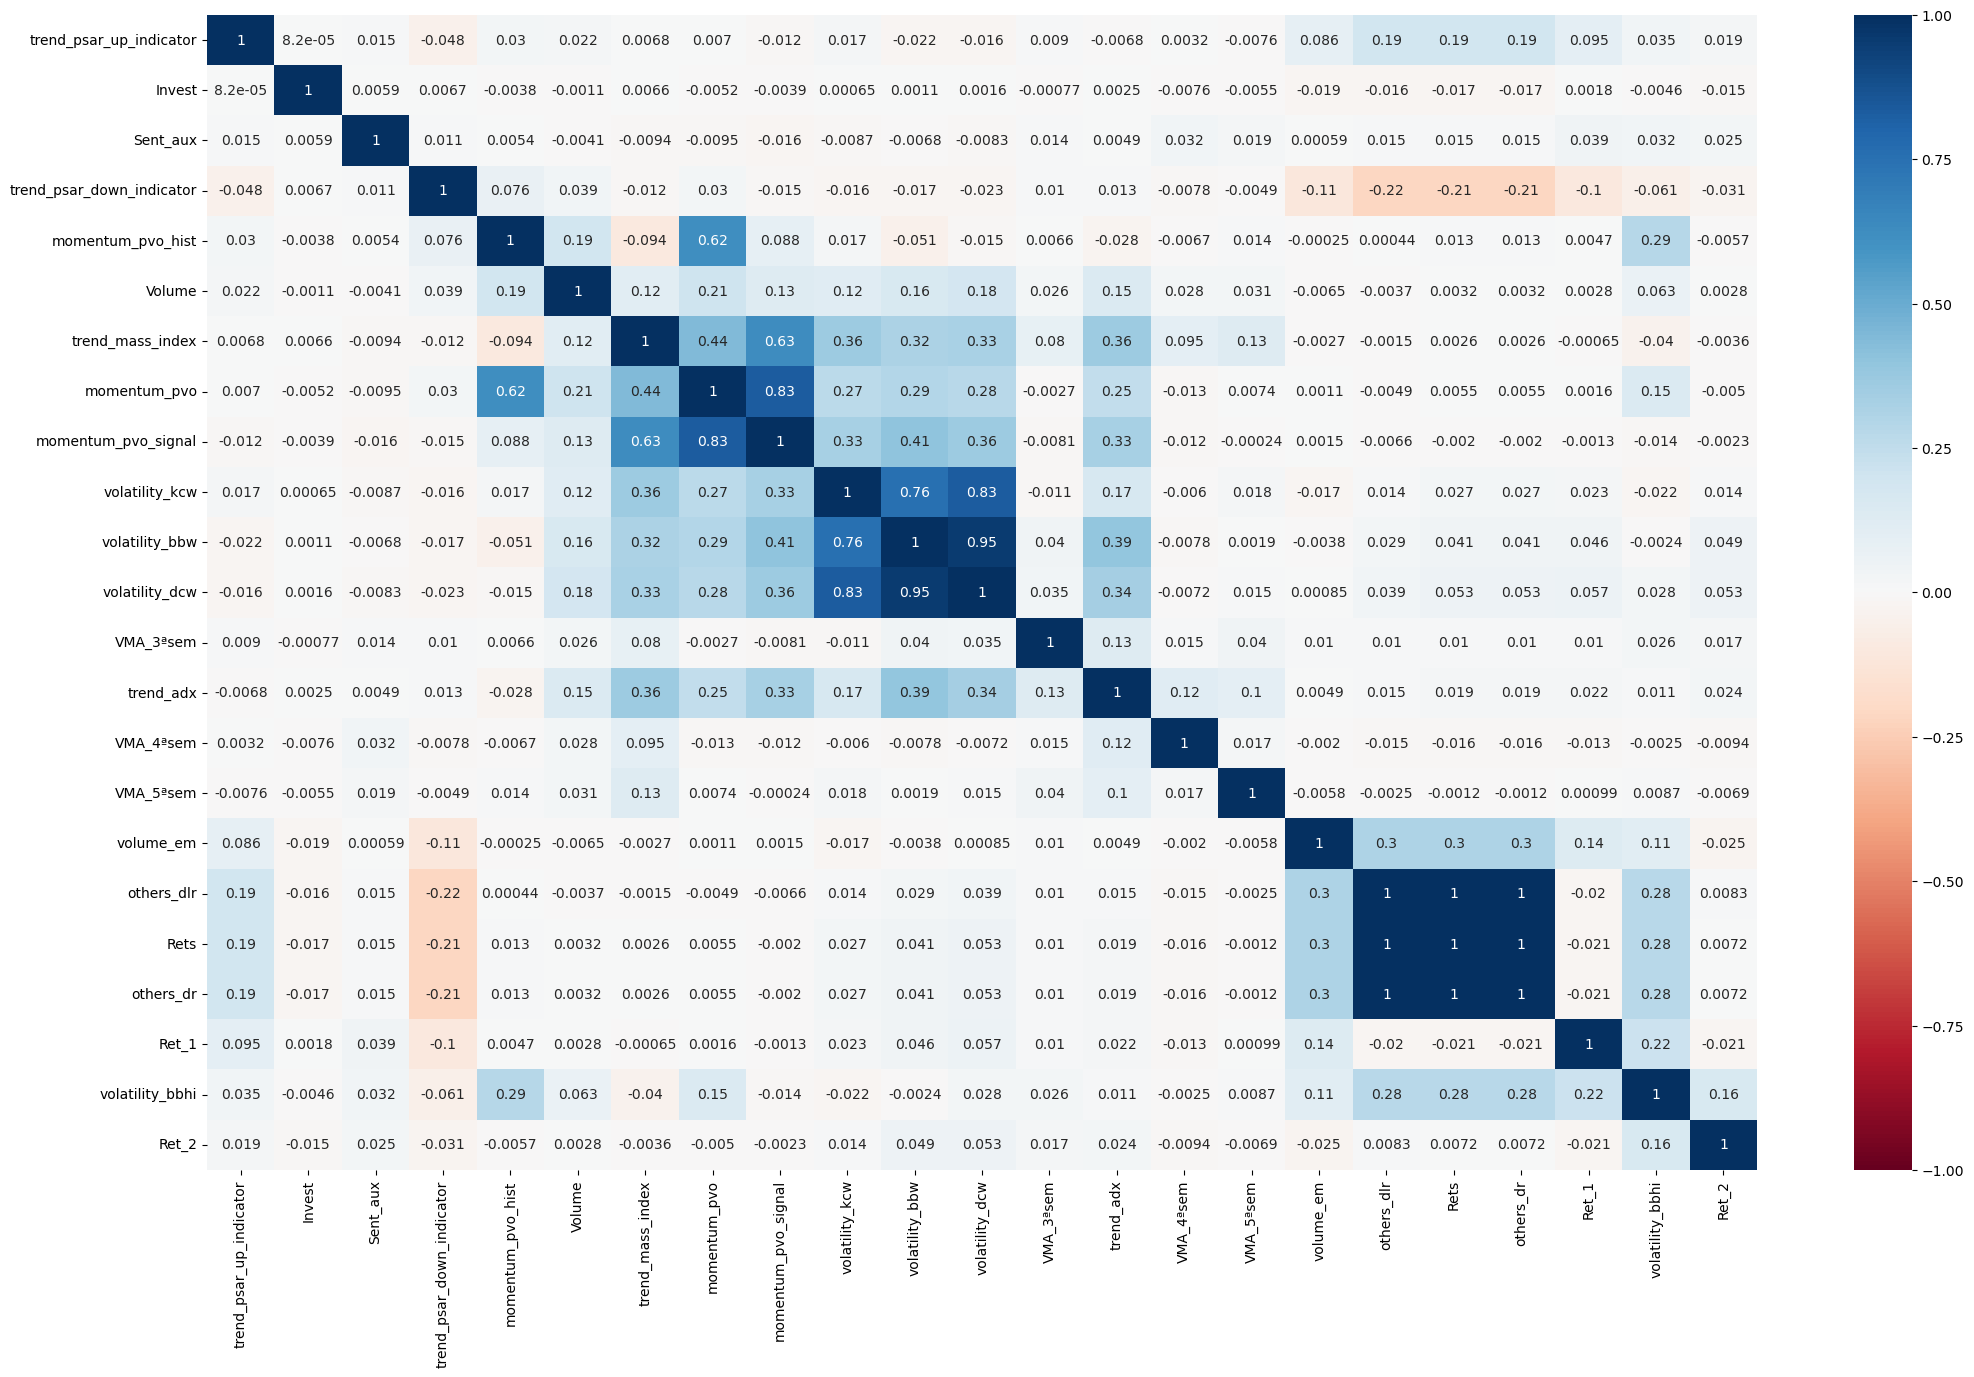

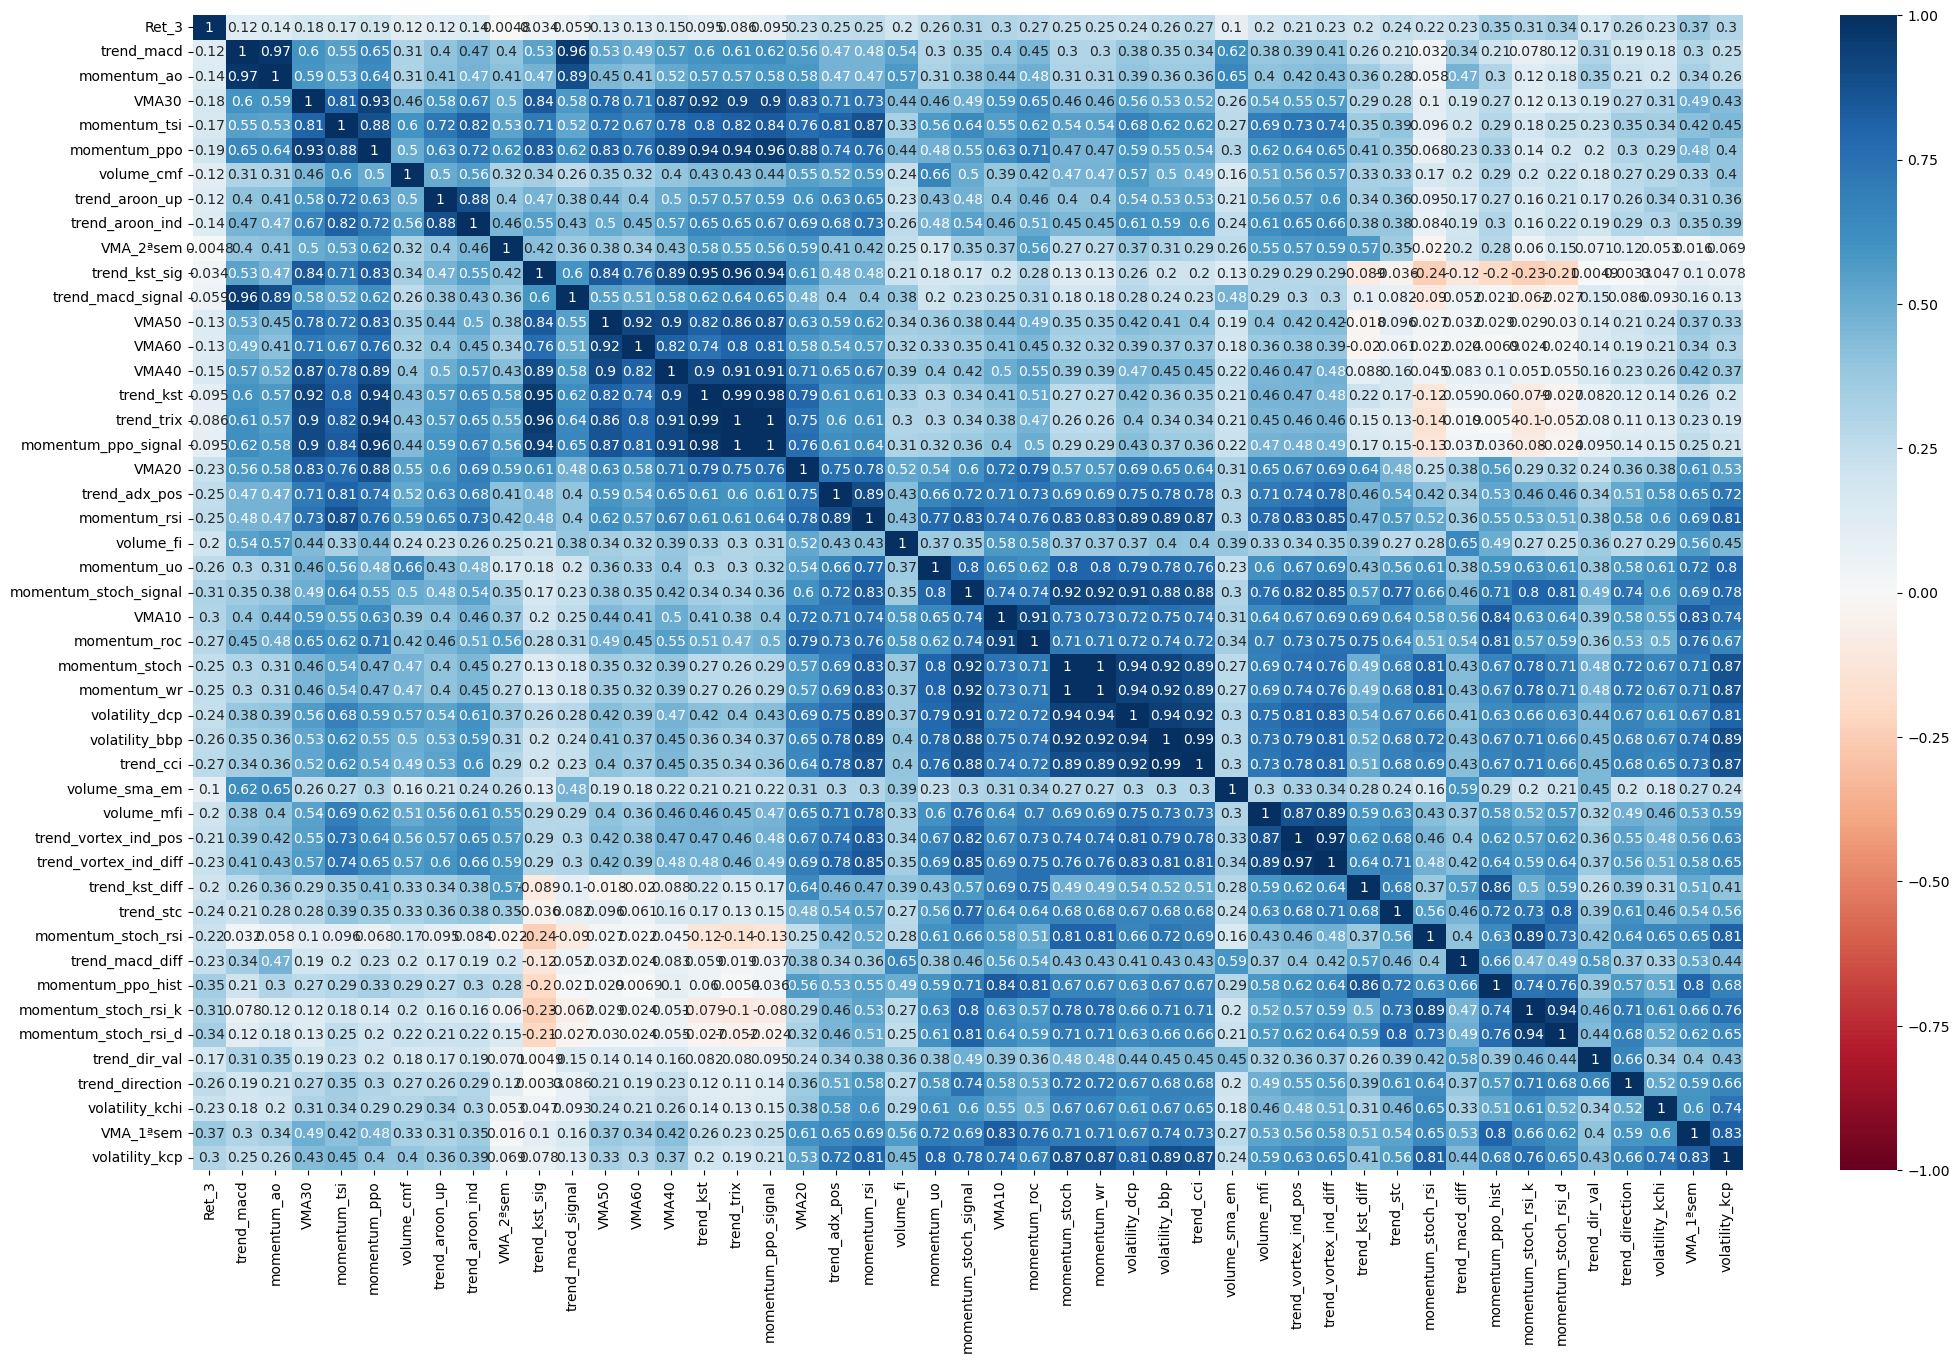

In [16]:
cols_index=[0, 7, 39, 62, len(df_numeric.columns)]
for i in range(1, len(cols_index)):
    cols = [col.get_text() for col in g.ax_heatmap.get_xticklabels()[cols_index[i-1]:cols_index[i]]]
    fig, axes = plt.subplots(figsize=(25, 15))
    sns.heatmap(df_numeric[cols].corr(), cmap='RdBu', annot=True, vmax=1, vmin=-1);
    plt.show();

Una correlación se considera elevada y puede afectar a algunos modelos por la multicolinealidad si es mayor de 0,6 o 0,7. Por este motivo los grupos más preocupantes son el segundo y el cuarto ya que son en los que las correlaciones suben de 0,7.

Vamos a ver las correlaciones en relacion con la variable respuesta ***Invest***. Para observar que ninguna columna esta correlacionada con esta.

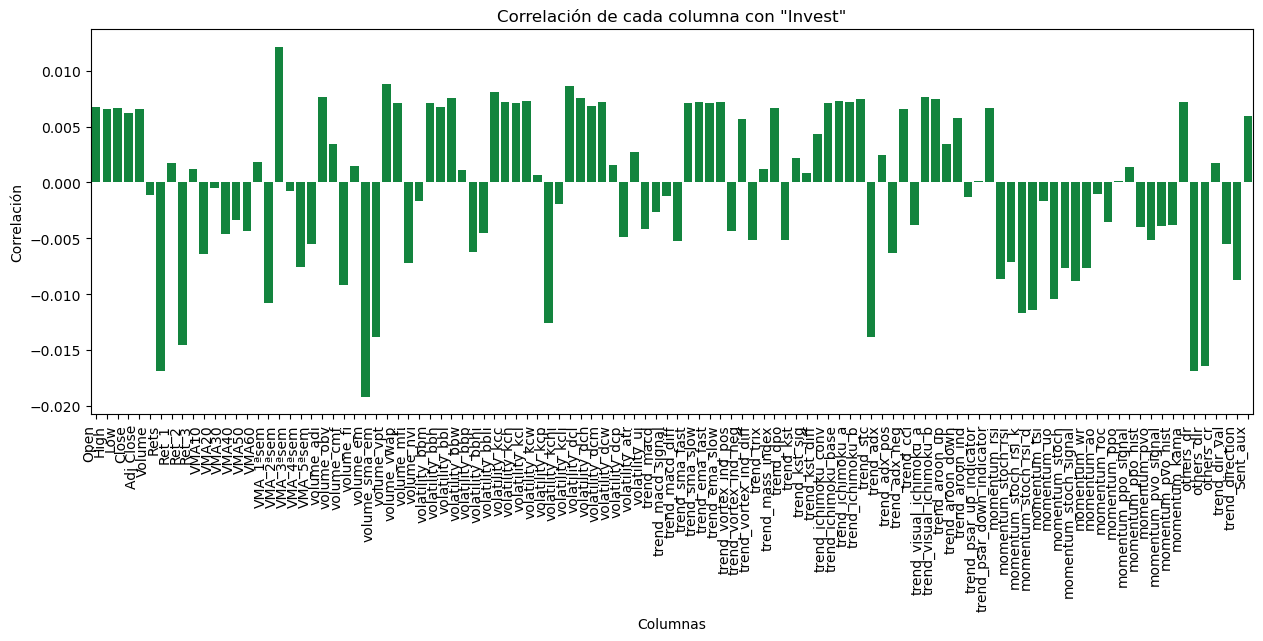

In [17]:
plt.figure(figsize=(15, 5))
sns.barplot(x=df_numeric.columns.drop('Invest'), y=df_numeric.corr()['Invest'].drop('Invest'), color='#009739')
plt.title('Correlación de cada columna con "Invest"')
plt.xlabel('Columnas')
plt.ylabel('Correlación')
plt.xticks(rotation=90, ha='right')
plt.show()

Podemos ver que en general la correlación con la variable objetivo es bastante baja. En ningún caso sobre pasa el 0,2(lo cual es bastante poco). Esto a priori podría ser un problema sin embargo confiamos en que haya relaciones más profundas y que nuestro modelo sea capaz de identificarlas.

Vamos a ver la correlación no lineal de las variables con el método de spearman.

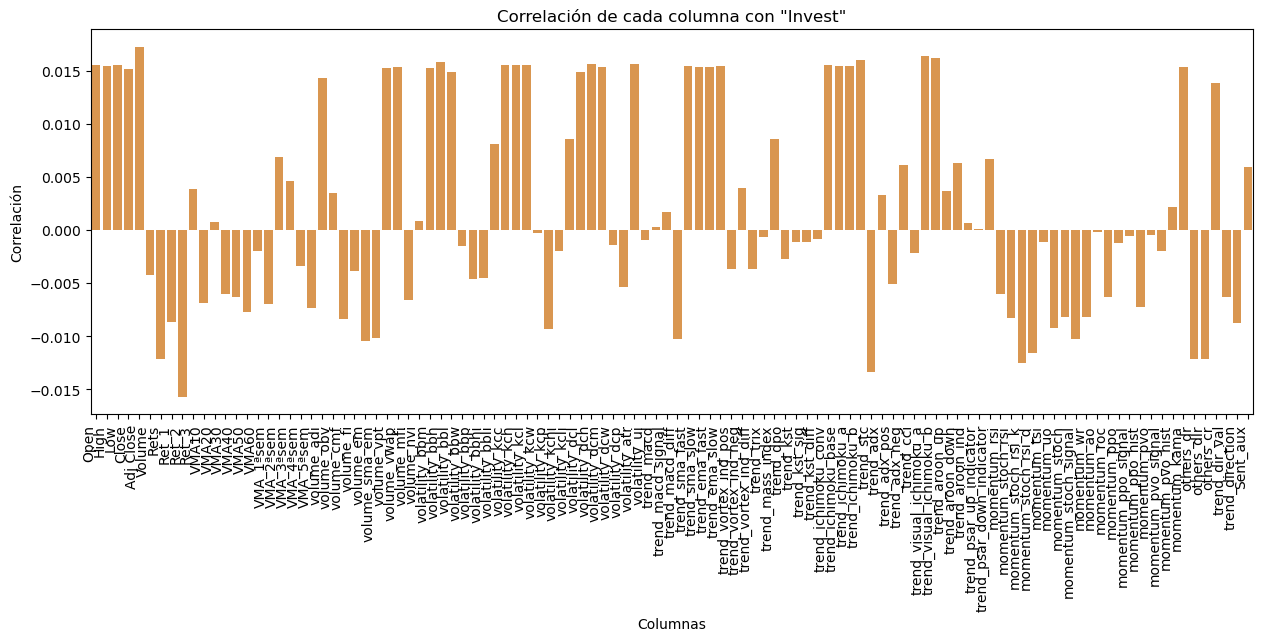

In [18]:
plt.figure(figsize=(15, 5))
sns.barplot(x=df_numeric.columns.drop('Invest'), y=df_numeric.corr(method='spearman')['Invest'].drop('Invest'), color='#F09739')
plt.title('Correlación de cada columna con "Invest"')
plt.xlabel('Columnas')
plt.ylabel('Correlación')
plt.xticks(rotation=90, ha='right')
plt.show()

Parece que, en general, la correlación ha subido ya que ahora hay barras más altas, sin embargo sigue siendo bastante baja y sigue sin sobrepasar el umbral de 0,2.

Vamos a ver como se distribuye la variable ***Sent***

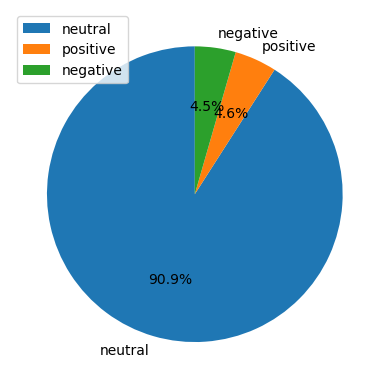

In [19]:
plt.pie(df['Sent'].value_counts(), labels=df['Sent'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.legend(loc='best')
plt.show()

Hay que ser consciente que solo se dispone de noticias desde 2015 y que antes de 2015 esa columna toma el valor ***neutral***. Por este motivo vamos a ver esta variable solo para las observaciones posteriores a 2015

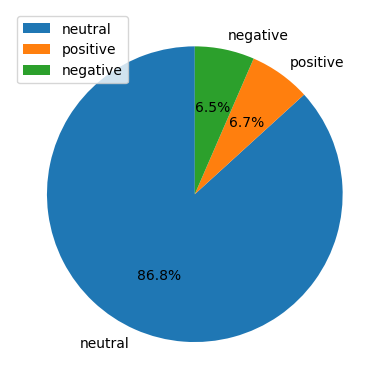

In [20]:
df_2015 = df[df['Date'] >'2015-01-01']
plt.pie(df_2015['Sent'].value_counts(), labels=df_2015['Sent'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.legend(loc='best')
plt.show()

No ha cambiado demasiado. La variable sigue siendo ***neutral*** la gran parte de las veces. El modelo que hemos utilizado para extraer el sentimiento predice en casi todos los casos un sentimiento neutral. Puede ser que esta columna no nos aporte demasiada información ya que casi siempre es neutral.

<AxesSubplot:>

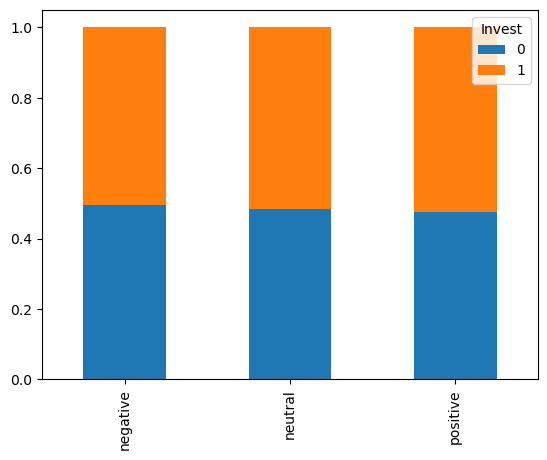

In [21]:
df_sent = df_numeric[['Invest', 'Sent_aux']].value_counts().unstack()
df_sent.columns = ['negative', 'neutral', 'positive']
df_sent = df_sent.T
df_sent['total'] = df_sent.sum(axis=1)
df_sent_percentage = df_sent.div(df_sent['total'], axis=0)[[0, 1]]
df_sent_percentage.plot(kind='bar', stacked=True)

array([<AxesSubplot:ylabel='negative'>, <AxesSubplot:ylabel='neutral'>,
       <AxesSubplot:ylabel='positive'>], dtype=object)

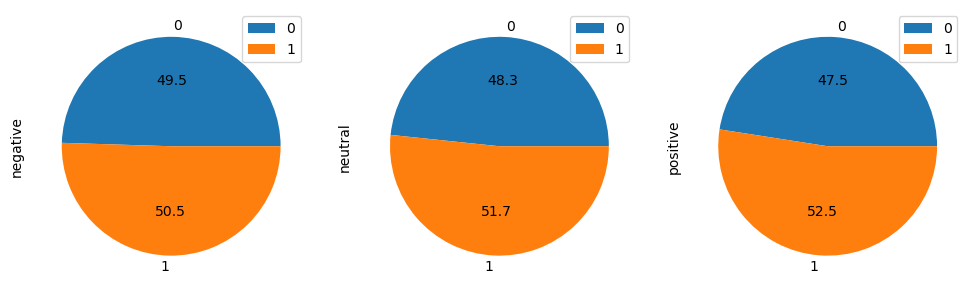

In [32]:
fig, axes = plt.subplots(1, 3, figsize=(12, 8))
df_sent_percentage.T.plot(kind='pie', autopct='%.1f', subplots=True, ax=axes)